In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import networkx as nx
import seaborn as sns
import statsmodels.api as sm

# Supress warning for clean notebook
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('tf_mini.csv')
df2 = pd.read_csv('log_mini.csv')
df = pd.merge(df1, df2, left_on='track_id', right_on='track_id_clean', how='inner')
df= df.drop('track_id_clean',axis=1)
df.head(5).T

0  \
track_id                         t_a540e552-16d4-42f8-a185-232bd650ea7d   
duration                                                     109.706673   
release_year                                                       1950   
us_popularity_estimate                                        99.975414   
acousticness                                                    0.45804   
beat_strength                                                  0.519497   
bounciness                                                     0.504949   
danceability                                                   0.399767   
dyn_range_mean                                                  7.51188   
energy                                                         0.817709   
flatness                                                       0.903753   
instrumentalness                                               0.000003   
key                                                                   0   
liveness                                                       0.132124   
loudness                                                        -11.238   
mechanism                                                        0.3861   
mode                                                              major   
organism                                                       0.541606   
speechiness                                                    0.079985   
tempo                                                        166.287003   
time_signature                                                        4   
valence                                                        0.935512   
acoustic_vector_0                                             -0.033284   
acoustic_vector_1                                             -0.411896   
acoustic_vector_2                                              -0.02858   
acoustic_vector_3                                              0.349438   
acoustic_vector_4                                              0.832467   
acoustic_vector_5                                             -0.213871   
acoustic_vector_6                                             -0.299464   
acoustic_vector_7                                             -0.675907   
session_id                       0_0e4a49d8-688d-4958-94db-5cb56adc3090   
session_position                                                     10   
session_length                                                       10   
skip_1                                                            False   
skip_2                                                            False   
skip_3                                                            False   
not_skipped                                                       False   
context_switch                                                        0   
no_pause_before_play                                                  1   
short_pause_before_play                                               0   
long_pause_before_play                                                0   
hist_user_behavior_n_seekfwd                                          0   
hist_user_behavior_n_seekback                                         0   
hist_user_behavior_is_shuffle                                      True   
hour_of_day                                                          10   
date                                                         2018-07-15   
premium                                                            True   
context_type                                            user_collection   
hist_user_behavior_reason_start                               trackdone   
hist_user_behavior_reason_end                                 trackdone   

                                                                      1  \
track_id                         t_67965da0-132b-4b1e-8a69-0ef99b32287c   
duration                                                     187.693329   
release_year       

1- columns explaination

* track_id: provides a unique identifier for each track.

* Duration: This column contains the length of each track in seconds.

* Release year: This column contains the year in which each track was released.

* Popularity estimate: This column contains an estimate of the popularity of each track on a scale of 0-100.

* Acousticness: This column contains a value representing the acousticness of each track, with higher values indicating a more acoustic sound.

* Beat strength: This column contains a value representing the strength of the beats in each track.

* Danceability: This column contains a value representing the danceability of each track, with higher values indicating that the track is more suitable for dancing.

* Energy: This column contains a value representing the energy of each track, with higher values indicating a more energetic sound.

* Loudness: This column contains a value representing the loudness of each track.

* Instrumentalness: This column contains a value representing the amount of vocals in each track, with higher values indicating that the track is more instrumental.

* Key: This column contains a value representing the key of each track, with values ranging from 0-11 representing different keys.

* Liveness: This column contains a value representing the liveliness of each track, with higher values indicating that the track sounds more like a live performance.

* Mode: This column contains a value representing the mode of each track, with "major" indicating a major key and "minor" indicating a minor key.

* Tempo: This column contains a value representing the tempo of each track in beats per minute.

* Valence: This column contains a value representing the valence (positivity) of each track, with higher values indicating a more positive or happy sound.

* acoustic_vector_(0-7) : values representing different acoustic vectors associated with each track, which represent different aspects of the track's sound.

* session_id:  a unique identifier for each session in the dataset

* session_position:  the position of the current track in the session

* session_length:  the total number of tracks in the session

* track_id_clean:  a unique identifier for each track

* skip_1, skip_2, skip_3:  binary variables indicating whether the user skipped the current track after 1, 2, or 3 seconds respectively

* not_skipped:  a binary variable indicating whether the user did not skip the current track

* context_switch:  a binary variable indicating whether the user switched from a different context (such as a different playlist or album) before playing the current track

* no_pause_before_play:  a binary variable indicating whether there was no pause between the previous track and the current track

* short_pause_before_play , long_pause_before_play:  binary variables indicating whether there was a short or long pause (less than 30 seconds or more than 30 seconds) between the previous track and the current track respectively

* hist_user_behavior_n_seekfwd: the number of times the user has seeked forward within the current session

* hist_user_behavior_n_seekback:  the number of times the user has seeked backward within the current session

* hist_user_behavior_is_shuffle:  a binary variable indicating whether the user has enabled shuffle mode for the current session

* hour_of_day:  the hour of the day when the track was played

* date:  the date when the track was played

* premium:  a binary variable indicating whether the user has a premium account

* context_type:  the type of context (such as editorial playlist, user-generated playlist, or album) for the current track

* hist_user_behavior_reason_start:  the reason why the current track was played (such as trackdone, fwdbtn, or playbtn)

* hist_user_behavior_reason_end:  the reason why the user stopped playing the current track (such as trackdone, endplay, or fwdbtn)



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   track_id                         167880 non-null  object 
 1   duration                         167880 non-null  float64
 2   release_year                     167880 non-null  int64  
 3   us_popularity_estimate           167880 non-null  float64
 4   acousticness                     167880 non-null  float64
 5   beat_strength                    167880 non-null  float64
 6   bounciness                       167880 non-null  float64
 7   danceability                     167880 non-null  float64
 8   dyn_range_mean                   167880 non-null  float64
 9   energy                           167880 non-null  float64
 10  flatness                         167880 non-null  float64
 11  instrumentalness                 167880 non-null  float64
 12  ke

Based on this dataset, here are the preprocessing techniques that will be applied:

* Data cleaning: Check for and remove missing values, duplicates, or outliers in the dataset.

* Data encoding: Encode categorical variables such as context_type, hist_user_behavior_reason_start, and hist_user_behavior_reason_end using one-hot encoding or label encoding techniques.

* Data normalization: Scale numerical variables such as session_position, session_length, hour_of_day, and hist_user_behavior_n_seekfwd using normalization techniques such as Min-Max scaling or Standard scaling.

* Feature selection: Determine which features are important and relevant for the prediction task, and exclude any unnecessary or redundant features.

* Handling time-series data: Convert the date feature to a datetime object and sort the dataset based on the timestamps. Split the data into consecutive sessions for time-series analysis.

 1- Date cleaning

* check for missing values
* duplicates
* outliers 
* handle date


In [4]:
df.isnull().sum()*100/df.shape[0] 

track_id                           0.0
duration                           0.0
release_year                       0.0
us_popularity_estimate             0.0
acousticness                       0.0
beat_strength                      0.0
bounciness                         0.0
danceability                       0.0
dyn_range_mean                     0.0
energy                             0.0
flatness                           0.0
instrumentalness                   0.0
key                                0.0
liveness                           0.0
loudness                           0.0
mechanism                          0.0
mode                               0.0
organism                           0.0
speechiness                        0.0
tempo                              0.0
time_signature                     0.0
valence                            0.0
acoustic_vector_0                  0.0
acoustic_vector_1                  0.0
acoustic_vector_2                  0.0
acoustic_vector_3        

no missing values

In [5]:
duplicate=df.duplicated()
print(duplicate.sum())

0


no duplicates

In [6]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [7]:
df.describe().T

count         mean        std          min  \
duration                       167880.0   215.893484  60.223626    30.013330   
release_year                   167880.0  2013.368614   9.740043  1950.000000   
us_popularity_estimate         167880.0    99.744583   0.892779    90.018900   
acousticness                   167880.0     0.217969   0.246097     0.000000   
beat_strength                  167880.0     0.547847   0.158555     0.000000   
bounciness                     167880.0     0.580170   0.179003     0.000000   
danceability                   167880.0     0.668978   0.159486     0.000000   
dyn_range_mean                 167880.0     9.098028   2.540397     0.000000   
energy                         167880.0     0.626536   0.181731     0.000000   
flatness                       167880.0     1.008124   0.038892     0.000000   
instrumentalness               167880.0     0.031743   0.142712     0.000000   
key                            167880.0     5.202692   3.681829     0.000000   
liveness                       167880.0     0.189810   0.150867     0.000000   
loudness                       167880.0    -7.049820   3.164024   -60.000000   
mechanism                      167880.0     0.596501   0.207718     0.000000   
organism                       167880.0     0.348247   0.188667     0.000000   
speechiness                    167880.0     0.142189   0.133225     0.000000   
tempo                          167880.0   122.674906  29.821581     0.000000   
time_signature                 167880.0     3.948916   0.336965     0.000000   
valence                        167880.0     0.459283   0.229190     0.000000   
acoustic_vector_0              167880.0    -0.516251   0.385527    -1.122792   
acoustic_vector_1              167880.0     0.268847   0.193834    -1.084360   
acoustic_vector_2              167880.0     0.206278   0.165442    -0.752231   
acoustic_vector_3              167880.0    -0.016393   0.266361    -0.809136   
acoustic_vector_4              167880.0    -0.139975   0.313722    -1.029858   
acoustic_vector_5              167880.0     0.047940   0.116279    -0.942461   
acoustic_vector_6              167880.0    -0.283057   0.301132    -0.736395   
acoustic_vector_7              167880.0     0.059859   0.261958    -0.975647   
session_position               167880.0     9.325911   5.457638     1.000000   
session_length                 167880.0    17.651823   3.422025    10.000000   
context_switch                 167880.0     0.040904   0.198069     0.000000   
no_pause_before_play           167880.0     0.767602   0.422363     0.000000   
short_pause_before_play        167880.0     0.146635   0.353742     0.000000   
long_pause_before_play         167880.0     0.172832   0.378103     0.000000   
hist_user_behavior_n_seekfwd   167880.0     0.038909   0.367295     0.000000   
hist_user_behavior_n_seekback  167880.0     0.046259   0.606558     0.000000   
hour_of_day                    167880.0    14.193084   5.996243     0.000000   
year                           167880.0  2018.000000   0.000000  2018.000000   
month                          167880.0     6.999071   0.037163     5.000000   
day                            167880.0    14.694311   0.641293     4.000000   

                                        25%           50%          75%  \
duration                       1.835034e+02  2.120270e+02   240.800003   
release_year                   2.015000e+03  2.017000e+03  2018.000000   
us_popularity_estimate         9.991383e+01  9.998878e+01    99.998715   
acousticness                   3.057884e-02  1.153625e-01     0.336899   
beat_strength                  4.340644e-01  5.507884e-01     0.665993   
bounciness                     4.518723e-01  5.940880e-01     0.724430   
danceability                   5.623497e-01  6.874273e-01     0.786602   
dyn_range_mean                 7.224558e+00  8.965730e+00    10.764786   
energy                         5.137112e-01  6.307876e-01     0.760826   
flatness     

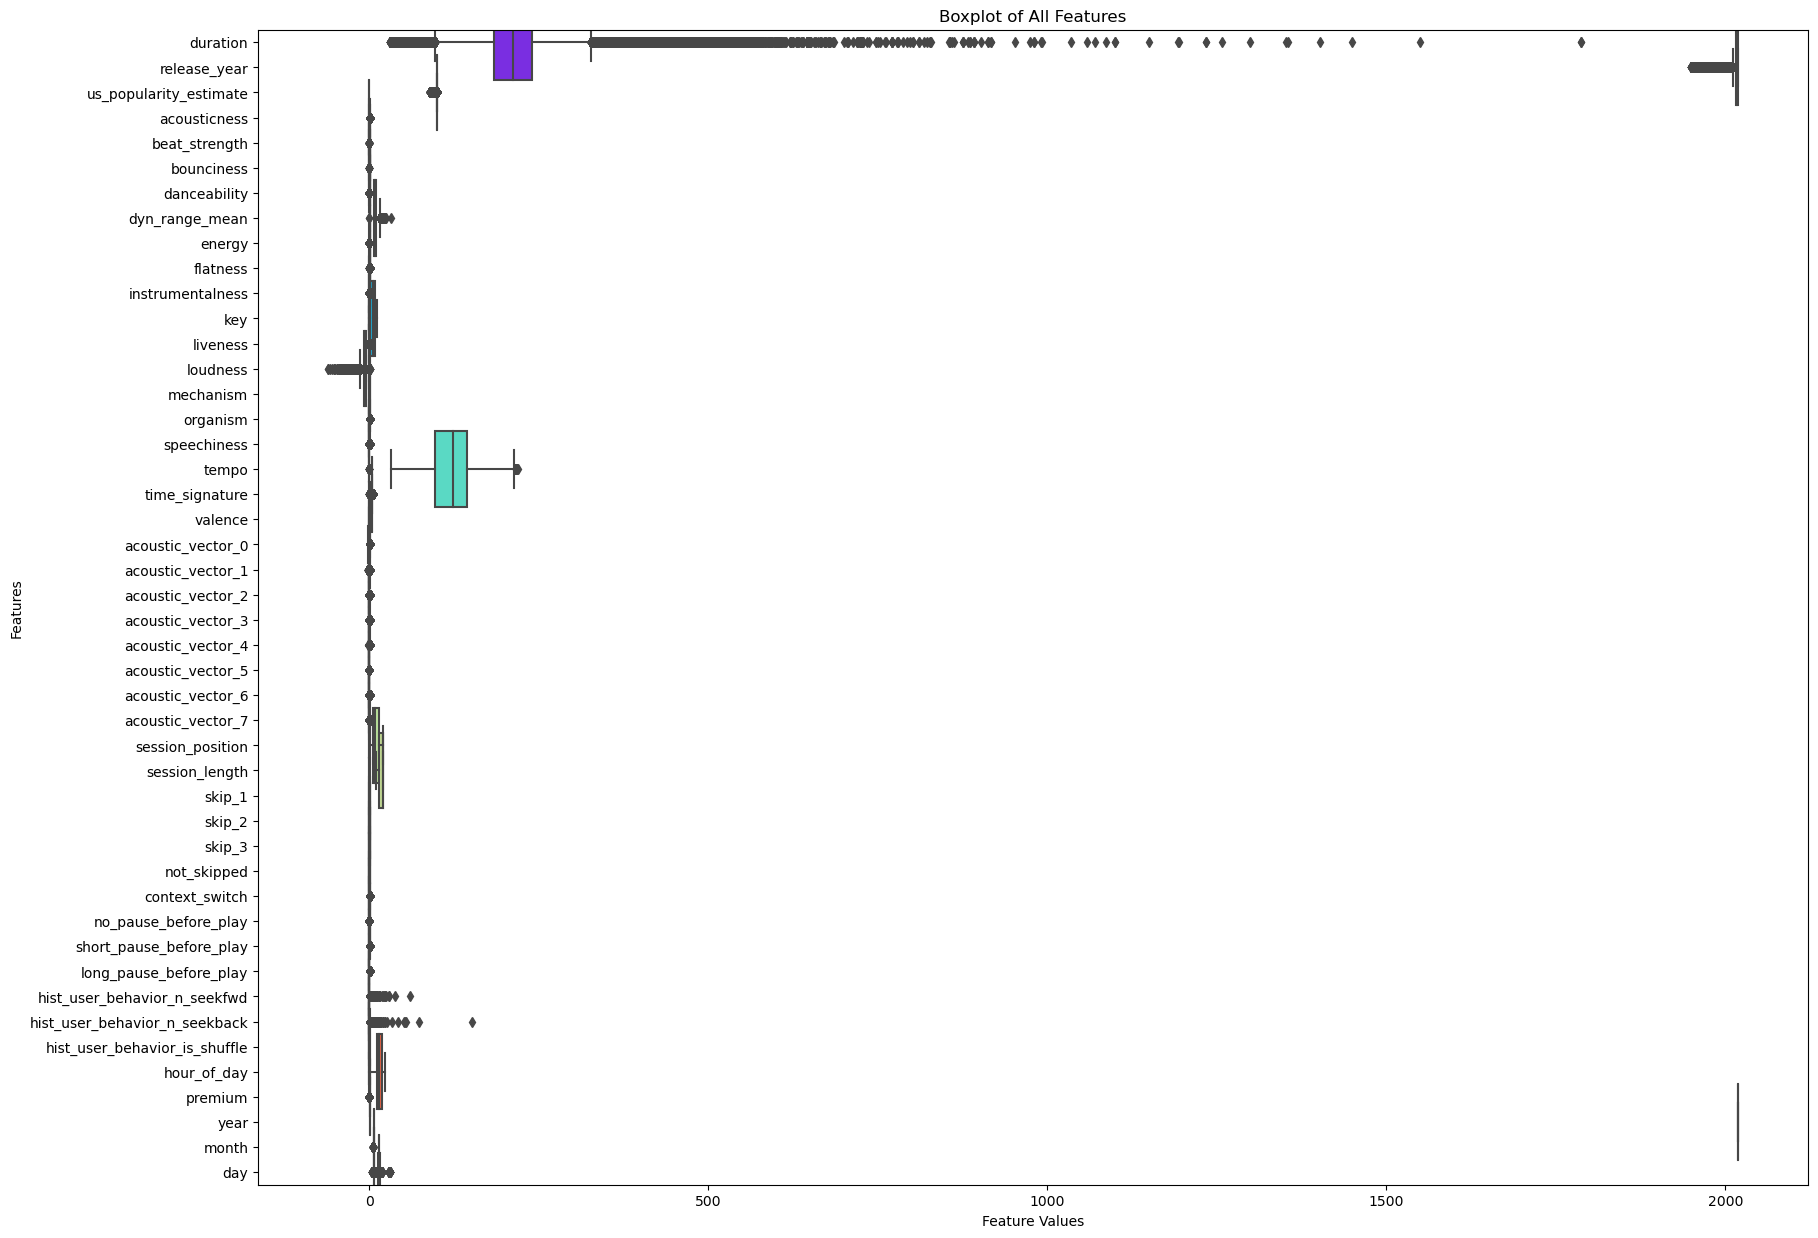

In [8]:
plt.figure(figsize=(20,15)) # Set the figure size
sns.boxplot(data=df, palette='rainbow', orient='h', width=3.0)
plt.title('Boxplot of All Features')
plt.xlabel('Feature Values')
plt.ylabel('Features')
plt.show()
#box plot to all features to show outliers

columns wwith outliers :
* ( hist_user_behavior_n_seekfwd, hist_user_behavior_n_seekback, tempo , loudness , dyn_range_mean ,duration )

In [9]:
def draw_boxplot(col):
  sns.boxplot(df[col]) 

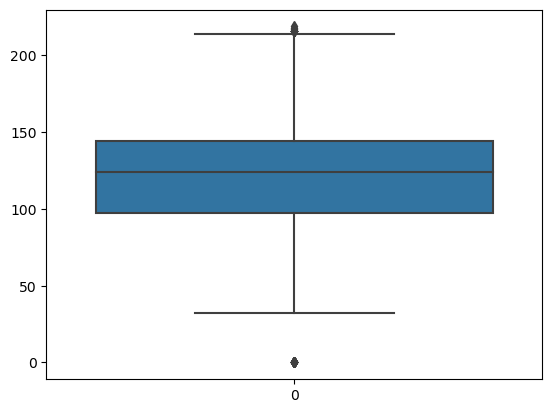

In [10]:
draw_boxplot('tempo')

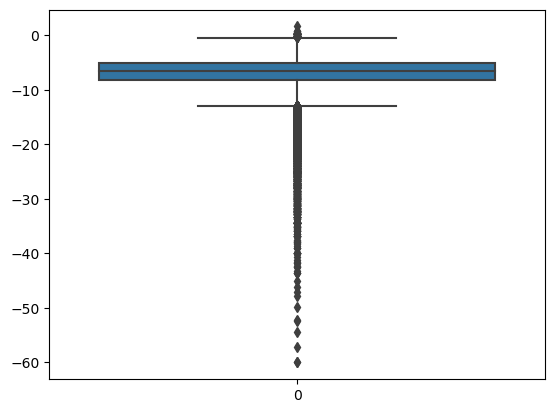

In [11]:
draw_boxplot('loudness')

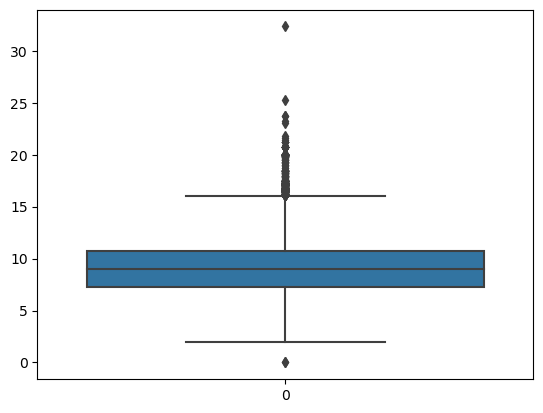

In [12]:
draw_boxplot('dyn_range_mean')

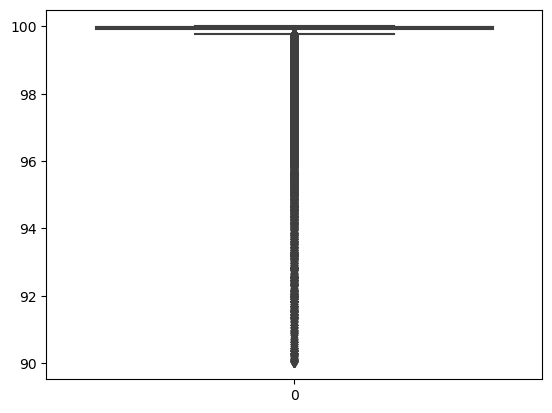

In [13]:
draw_boxplot('us_popularity_estimate')

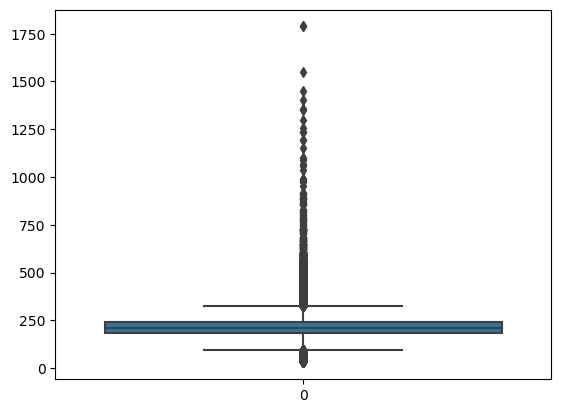

In [14]:
draw_boxplot('duration')

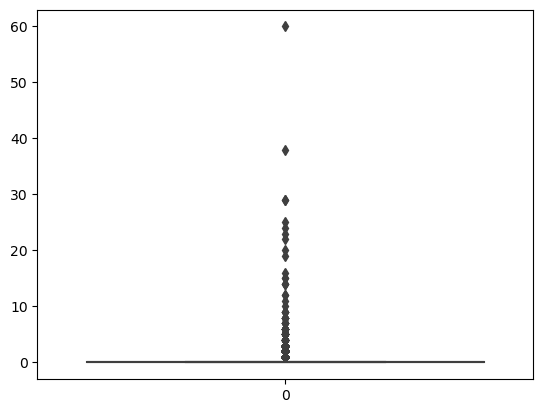

In [15]:
draw_boxplot('hist_user_behavior_n_seekfwd')

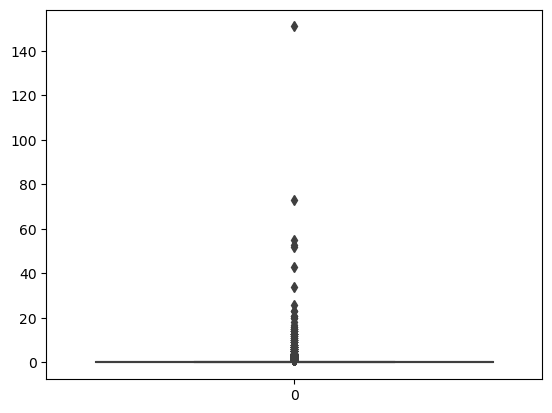

In [16]:
draw_boxplot('hist_user_behavior_n_seekback')

we need to deal with outliers

In [17]:
def handle_outlier(df, col_name):
    Q1, Q3 = df[col_name].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    df.loc[df[col_name] < lower, col_name] = lower
    df.loc[df[col_name] > upper, col_name] = upper

In [18]:
df['hist_user_behavior_n_seekfwd'].value_counts()

0     163216
1       3786
2        536
3        184
4         65
5         36
6         17
8          8
7          7
9          5
14         3
29         2
15         2
12         2
60         1
22         1
16         1
23         1
25         1
19         1
38         1
11         1
20         1
24         1
10         1
Name: hist_user_behavior_n_seekfwd, dtype: int64

In [19]:
handle_outlier(df,'tempo')

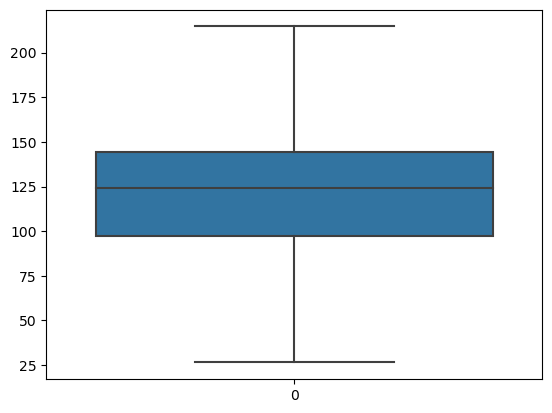

In [20]:
draw_boxplot('tempo')

In [21]:
handle_outlier(df,'loudness')

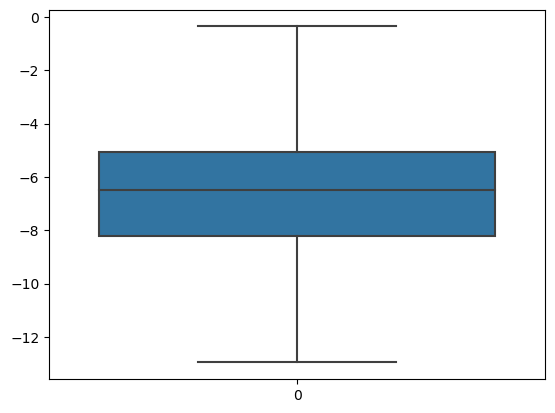

In [22]:
draw_boxplot('loudness')

In [23]:
handle_outlier(df,'dyn_range_mean')

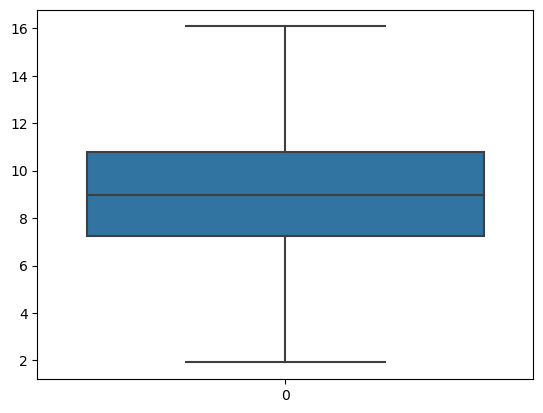

In [24]:
draw_boxplot('dyn_range_mean')

In [25]:
handle_outlier(df,'us_popularity_estimate')

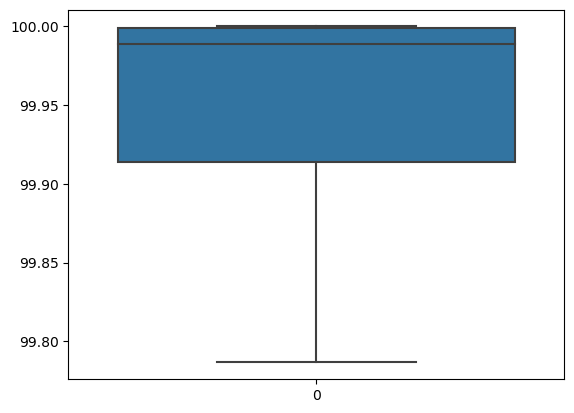

In [26]:
draw_boxplot('us_popularity_estimate')

In [27]:
handle_outlier(df,'duration')

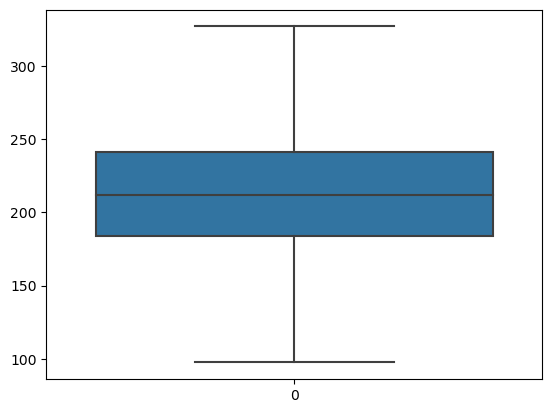

In [28]:
draw_boxplot('duration')

In [29]:
df['hist_user_behavior_n_seekfwd'].value_counts()

0     163216
1       3786
2        536
3        184
4         65
5         36
6         17
8          8
7          7
9          5
14         3
29         2
15         2
12         2
60         1
22         1
16         1
23         1
25         1
19         1
38         1
11         1
20         1
24         1
10         1
Name: hist_user_behavior_n_seekfwd, dtype: int64

In [30]:
df['hist_user_behavior_n_seekback'].value_counts()

0      162705
1        4278
2         521
3         150
4          82
5          40
7          22
6          15
8          10
13          9
9           7
10          6
14          5
12          4
11          4
15          4
16          2
21          2
23          2
20          2
151         1
53          1
34          1
52          1
73          1
55          1
17          1
18          1
43          1
26          1
Name: hist_user_behavior_n_seekback, dtype: int64

In [31]:
def draw_scatterplot(col1,col2):
  plt.scatter(df[col2],df[col1])


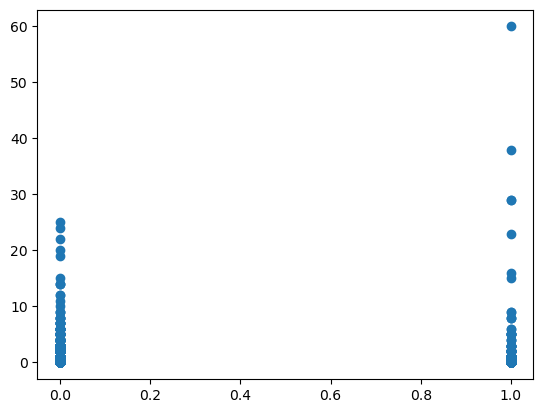

In [32]:
draw_scatterplot('hist_user_behavior_n_seekfwd','not_skipped')

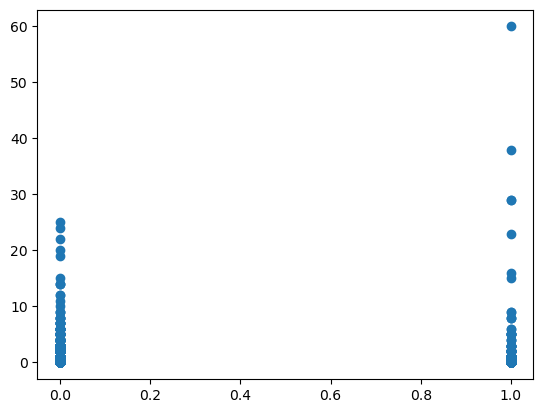

In [33]:
draw_scatterplot('hist_user_behavior_n_seekfwd','not_skipped')

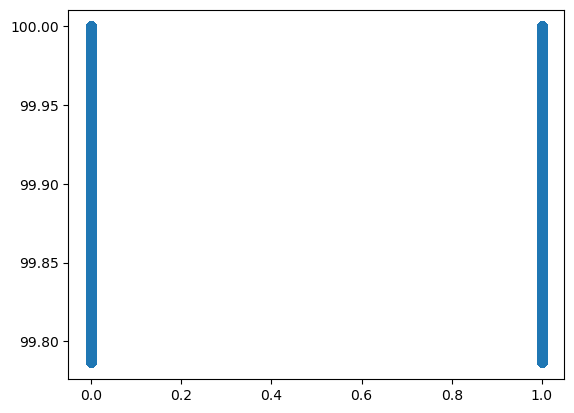

In [34]:
draw_scatterplot('us_popularity_estimate','not_skipped')

In [35]:
df = df[df['hist_user_behavior_n_seekback'] != 151 ]

Done dealing with outliers that may affect our data and kept the ones that doesn't affect our target column

In [36]:
df.shape

(167879, 53)

2-Data encoding

In [37]:
df.head().T

0  \
track_id                         t_a540e552-16d4-42f8-a185-232bd650ea7d   
duration                                                     109.706673   
release_year                                                       1950   
us_popularity_estimate                                        99.975414   
acousticness                                                    0.45804   
beat_strength                                                  0.519497   
bounciness                                                     0.504949   
danceability                                                   0.399767   
dyn_range_mean                                                  7.51188   
energy                                                         0.817709   
flatness                                                       0.903753   
instrumentalness                                               0.000003   
key                                                                   0   
liveness                                                       0.132124   
loudness                                                        -11.238   
mechanism                                                        0.3861   
mode                                                              major   
organism                                                       0.541606   
speechiness                                                    0.079985   
tempo                                                        166.287003   
time_signature                                                        4   
valence                                                        0.935512   
acoustic_vector_0                                             -0.033284   
acoustic_vector_1                                             -0.411896   
acoustic_vector_2                                              -0.02858   
acoustic_vector_3                                              0.349438   
acoustic_vector_4                                              0.832467   
acoustic_vector_5                                             -0.213871   
acoustic_vector_6                                             -0.299464   
acoustic_vector_7                                             -0.675907   
session_id                       0_0e4a49d8-688d-4958-94db-5cb56adc3090   
session_position                                                     10   
session_length                                                       10   
skip_1                                                            False   
skip_2                                                            False   
skip_3                                                            False   
not_skipped                                                       False   
context_switch                                                        0   
no_pause_before_play                                                  1   
short_pause_before_play                                               0   
long_pause_before_play                                                0   
hist_user_behavior_n_seekfwd                                          0   
hist_user_behavior_n_seekback                                         0   
hist_user_behavior_is_shuffle                                      True   
hour_of_day                                                          10   
date                                                2018-07-15 00:00:00   
premium                                                            True   
context_type                                            user_collection   
hist_user_behavior_reason_start                               trackdone   
hist_user_behavior_reason_end                                 trackdone   
year                                                               2018   
month                                                                 7   
day                                                                  15   

                   

Encode categorical variables :
* mode / context_type / hist_user_behavior_reason_start /  hist_user_behavior_reason_end :: using label encoding techniques.

In [38]:
df['mode'].value_counts()


major    103062
minor     64817
Name: mode, dtype: int64

In [39]:
df['session_id'].value_counts()

0_004f4627-4bb0-4c79-b93f-f85d494108ac    20
0_02ea1de9-186e-4cb6-9509-215a434d0024    20
0_085887ec-0b1f-433e-8cb5-7481e780c1ed    20
0_07d4ceef-49b3-475b-b4b6-9cbc8237ff10    20
0_05dd7cbb-3fde-4daa-b461-223ca5dc9d75    20
                                          ..
0_044a391f-37c6-422b-9cd1-7a3ec54cc19b    10
0_09fcb11e-26df-4ac8-a4c0-eaf18ebbb9e8    10
0_003d0b7d-8c68-49b4-b0c0-49e501978523    10
0_0d687ef6-77bc-4707-b18a-329828bbd02f    10
0_0e4a49d8-688d-4958-94db-5cb56adc3090    10
Name: session_id, Length: 10000, dtype: int64

In [40]:
df['context_type'].value_counts()


user_collection          67430
catalog                  38262
editorial_playlist       35663
radio                    21107
personalized_playlist     2976
charts                    2441
Name: context_type, dtype: int64

In [41]:
df['hist_user_behavior_reason_start'].value_counts()

fwdbtn        79911
trackdone     55075
clickrow      17514
backbtn       13034
appload        1942
playbtn         155
remote          136
trackerror       92
endplay          20
Name: hist_user_behavior_reason_start, dtype: int64

In [42]:
df['hist_user_behavior_reason_end'].value_counts()

fwdbtn       81389
trackdone    57701
endplay      14823
backbtn      13128
logout         563
remote         267
clickrow         8
Name: hist_user_behavior_reason_end, dtype: int64

  As we can see, each column can be one from many choices so using label encoding is prefered as we wont need to create many more features

In [43]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['mode']= encoder.fit_transform(df['mode'])
df['mode'].value_counts()

0    103062
1     64817
Name: mode, dtype: int64

In [44]:
df['session_id']= encoder.fit_transform(df['session_id'])
df['session_id'].value_counts()

230     20
1991    20
5712    20
5382    20
4039    20
        ..
2977    10
6800    10
181     10
9123    10
9750    10
Name: session_id, Length: 10000, dtype: int64

In [45]:
df['context_type']= encoder.fit_transform(df['context_type'])
df['context_type'].value_counts()

5    67430
0    38262
2    35663
4    21107
3     2976
1     2441
Name: context_type, dtype: int64

In [46]:
df['hist_user_behavior_reason_start']= encoder.fit_transform(df['hist_user_behavior_reason_start'])
df['hist_user_behavior_reason_start'].value_counts()

4    79911
7    55075
2    17514
1    13034
0     1942
5      155
6      136
8       92
3       20
Name: hist_user_behavior_reason_start, dtype: int64

In [47]:
df['hist_user_behavior_reason_end']= encoder.fit_transform(df['hist_user_behavior_reason_end'])
df['hist_user_behavior_reason_end'].value_counts()

3    81389
6    57701
2    14823
0    13128
4      563
5      267
1        8
Name: hist_user_behavior_reason_end, dtype: int64

now lets encode all bool features

In [48]:
df['not_skipped'] = df['not_skipped'].astype(int)
df['skip_3'] = df['skip_3'].astype(int)
df['skip_2'] = df['skip_2'].astype(int)
df['skip_1'] = df['skip_1'].astype(int)
df['premium'] = df['premium'].astype(int)
df['hist_user_behavior_is_shuffle'] = df['hist_user_behavior_is_shuffle'].astype(int)

In [49]:
df.head().T

0  \
track_id                         t_a540e552-16d4-42f8-a185-232bd650ea7d   
duration                                                     109.706673   
release_year                                                       1950   
us_popularity_estimate                                        99.975414   
acousticness                                                    0.45804   
beat_strength                                                  0.519497   
bounciness                                                     0.504949   
danceability                                                   0.399767   
dyn_range_mean                                                  7.51188   
energy                                                         0.817709   
flatness                                                       0.903753   
instrumentalness                                               0.000003   
key                                                                   0   
liveness                                                       0.132124   
loudness                                                        -11.238   
mechanism                                                        0.3861   
mode                                                                  0   
organism                                                       0.541606   
speechiness                                                    0.079985   
tempo                                                        166.287003   
time_signature                                                        4   
valence                                                        0.935512   
acoustic_vector_0                                             -0.033284   
acoustic_vector_1                                             -0.411896   
acoustic_vector_2                                              -0.02858   
acoustic_vector_3                                              0.349438   
acoustic_vector_4                                              0.832467   
acoustic_vector_5                                             -0.213871   
acoustic_vector_6                                             -0.299464   
acoustic_vector_7                                             -0.675907   
session_id                                                         9750   
session_position                                                     10   
session_length                                                       10   
skip_1                                                                0   
skip_2                                                                0   
skip_3                                                                0   
not_skipped                                                           0   
context_switch                                                        0   
no_pause_before_play                                                  1   
short_pause_before_play                                               0   
long_pause_before_play                                                0   
hist_user_behavior_n_seekfwd                                          0   
hist_user_behavior_n_seekback                                         0   
hist_user_behavior_is_shuffle                                         1   
hour_of_day                                                          10   
date                                                2018-07-15 00:00:00   
premium                                                               1   
context_type                                                          5   
hist_user_behavior_reason_start                                       7   
hist_user_behavior_reason_end                                         6   
year                                                               2018   
month                                                                 7   
day                                                                  15   

                   

done with encoding

3- Data Normailzation

In [50]:
df.head().T

0  \
track_id                         t_a540e552-16d4-42f8-a185-232bd650ea7d   
duration                                                     109.706673   
release_year                                                       1950   
us_popularity_estimate                                        99.975414   
acousticness                                                    0.45804   
beat_strength                                                  0.519497   
bounciness                                                     0.504949   
danceability                                                   0.399767   
dyn_range_mean                                                  7.51188   
energy                                                         0.817709   
flatness                                                       0.903753   
instrumentalness                                               0.000003   
key                                                                   0   
liveness                                                       0.132124   
loudness                                                        -11.238   
mechanism                                                        0.3861   
mode                                                                  0   
organism                                                       0.541606   
speechiness                                                    0.079985   
tempo                                                        166.287003   
time_signature                                                        4   
valence                                                        0.935512   
acoustic_vector_0                                             -0.033284   
acoustic_vector_1                                             -0.411896   
acoustic_vector_2                                              -0.02858   
acoustic_vector_3                                              0.349438   
acoustic_vector_4                                              0.832467   
acoustic_vector_5                                             -0.213871   
acoustic_vector_6                                             -0.299464   
acoustic_vector_7                                             -0.675907   
session_id                                                         9750   
session_position                                                     10   
session_length                                                       10   
skip_1                                                                0   
skip_2                                                                0   
skip_3                                                                0   
not_skipped                                                           0   
context_switch                                                        0   
no_pause_before_play                                                  1   
short_pause_before_play                                               0   
long_pause_before_play                                                0   
hist_user_behavior_n_seekfwd                                          0   
hist_user_behavior_n_seekback                                         0   
hist_user_behavior_is_shuffle                                         1   
hour_of_day                                                          10   
date                                                2018-07-15 00:00:00   
premium                                                               1   
context_type                                                          5   
hist_user_behavior_reason_start                                       7   
hist_user_behavior_reason_end                                         6   
year                                                               2018   
month                                                                 7   
day                                                                  15   

                   

Scale numerical variables such as :
* session_position, session_length, hour_of_day, and hist_user_behavior_n_seekfwd using normalization techniques such as Min-Max scaling or Standard scaling.

In [51]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()

df['duration']=scaling.fit_transform(df[['duration']])
df['us_popularity_estimate']=scaling.fit_transform(df[['us_popularity_estimate']])
df['dyn_range_mean']=scaling.fit_transform(df[['dyn_range_mean']])
df['loudness']=scaling.fit_transform(df[['loudness']])
df['tempo']=scaling.fit_transform(df[['tempo']])

done with scaling numerical data

4- Feature selection


*  Determine which features are important and relevant for the prediction task, and exclude any unnecessary or redundant features.

In [52]:
df.head().T

0  \
track_id                         t_a540e552-16d4-42f8-a185-232bd650ea7d   
duration                                                      -2.101816   
release_year                                                       1950   
us_popularity_estimate                                         0.403572   
acousticness                                                    0.45804   
beat_strength                                                  0.519497   
bounciness                                                     0.504949   
danceability                                                   0.399767   
dyn_range_mean                                                -0.628115   
energy                                                         0.817709   
flatness                                                       0.903753   
instrumentalness                                               0.000003   
key                                                                   0   
liveness                                                       0.132124   
loudness                                                      -1.702683   
mechanism                                                        0.3861   
mode                                                                  0   
organism                                                       0.541606   
speechiness                                                    0.079985   
tempo                                                          1.463288   
time_signature                                                        4   
valence                                                        0.935512   
acoustic_vector_0                                             -0.033284   
acoustic_vector_1                                             -0.411896   
acoustic_vector_2                                              -0.02858   
acoustic_vector_3                                              0.349438   
acoustic_vector_4                                              0.832467   
acoustic_vector_5                                             -0.213871   
acoustic_vector_6                                             -0.299464   
acoustic_vector_7                                             -0.675907   
session_id                                                         9750   
session_position                                                     10   
session_length                                                       10   
skip_1                                                                0   
skip_2                                                                0   
skip_3                                                                0   
not_skipped                                                           0   
context_switch                                                        0   
no_pause_before_play                                                  1   
short_pause_before_play                                               0   
long_pause_before_play                                                0   
hist_user_behavior_n_seekfwd                                          0   
hist_user_behavior_n_seekback                                         0   
hist_user_behavior_is_shuffle                                         1   
hour_of_day                                                          10   
date                                                2018-07-15 00:00:00   
premium                                                               1   
context_type                                                          5   
hist_user_behavior_reason_start                                       7   
hist_user_behavior_reason_end                                         6   
year                                                               2018   
month                                                                 7   
day                                                                  15   

                   

In [53]:
df["skipped"] = df["skip_1"]*df["skip_2"]*df["skip_3"]
df.drop(["skip_1", "skip_2", "skip_3", "not_skipped"], axis=1, inplace=True)

In [54]:
#Correlation using heatmap
def heat_map(df):
    plt.figure(figsize=(70, 70))
    heatmap = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu",annot_kws={"fontsize":20}, vmin=-1, vmax=1)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=15)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=15)
    plt.tight_layout()
    plt.show()

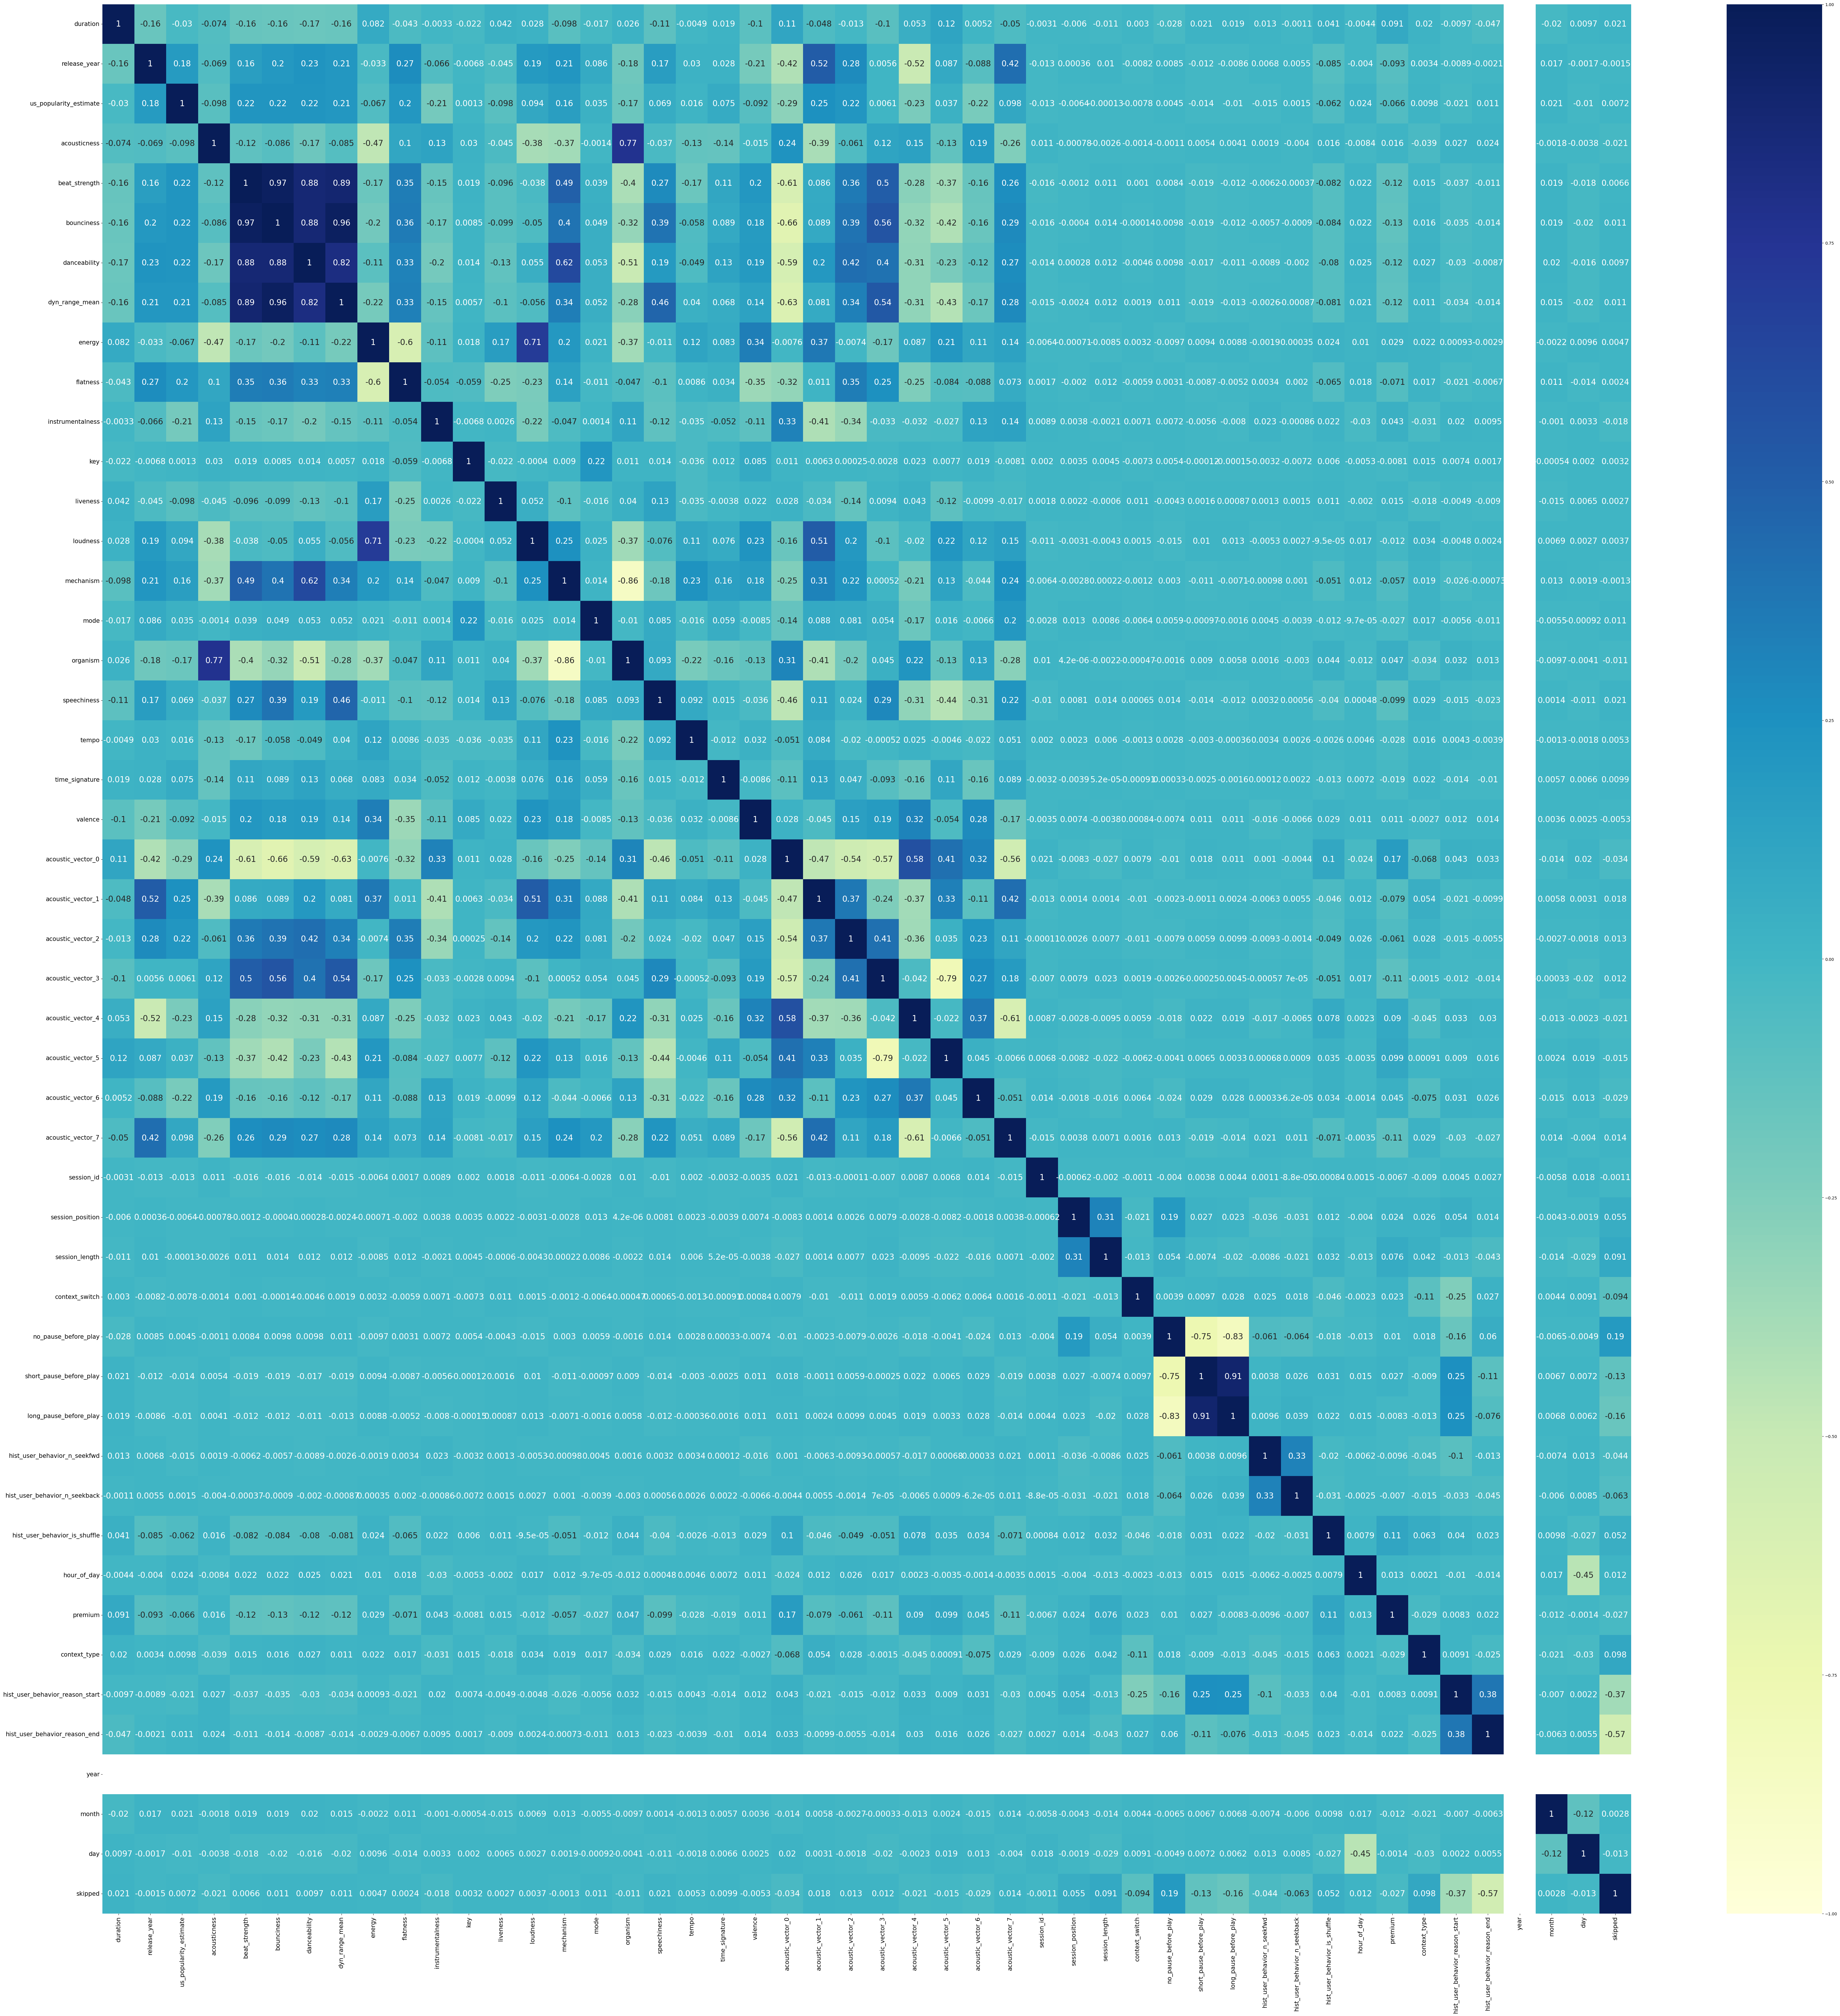

In [56]:
heat_map(df)

we can see that hist_user_behavior_reason_start & hist_user_behavior_reason_start have the highest relation than other columns with our target column.Also, a High negative relation with skip(1,2 & 3) columns, which means they are inversely proportional

In [55]:
df.head().T

0  \
track_id                         t_a540e552-16d4-42f8-a185-232bd650ea7d   
duration                                                      -2.101816   
release_year                                                       1950   
us_popularity_estimate                                         0.403572   
acousticness                                                    0.45804   
beat_strength                                                  0.519497   
bounciness                                                     0.504949   
danceability                                                   0.399767   
dyn_range_mean                                                -0.628115   
energy                                                         0.817709   
flatness                                                       0.903753   
instrumentalness                                               0.000003   
key                                                                   0   
liveness                                                       0.132124   
loudness                                                      -1.702683   
mechanism                                                        0.3861   
mode                                                                  0   
organism                                                       0.541606   
speechiness                                                    0.079985   
tempo                                                          1.463288   
time_signature                                                        4   
valence                                                        0.935512   
acoustic_vector_0                                             -0.033284   
acoustic_vector_1                                             -0.411896   
acoustic_vector_2                                              -0.02858   
acoustic_vector_3                                              0.349438   
acoustic_vector_4                                              0.832467   
acoustic_vector_5                                             -0.213871   
acoustic_vector_6                                             -0.299464   
acoustic_vector_7                                             -0.675907   
session_id                                                         9750   
session_position                                                     10   
session_length                                                       10   
context_switch                                                        0   
no_pause_before_play                                                  1   
short_pause_before_play                                               0   
long_pause_before_play                                                0   
hist_user_behavior_n_seekfwd                                          0   
hist_user_behavior_n_seekback                                         0   
hist_user_behavior_is_shuffle                                         1   
hour_of_day                                                          10   
date                                                2018-07-15 00:00:00   
premium                                                               1   
context_type                                                          5   
hist_user_behavior_reason_start                                       7   
hist_user_behavior_reason_end                                         6   
year                                                               2018   
month                                                                 7   
day                                                                  15   
skipped                                                               0   

                                                                      1  \
track_id                         t_67965da0-132b-4b1e-8a69-0ef99b32287c   
duration                                                      -0.525216   
release_year       

In [56]:
def get_network_graph(source_column):
  g=nx.from_pandas_edgelist(df,source=source_column, target="skipped", edge_attr= None )
  plt.Figure(figsize=(16,10))
  plt.plot(g,  color='red')
  plt.draw()
  # function make a network plot to show the network relations between entities of the data and the target 

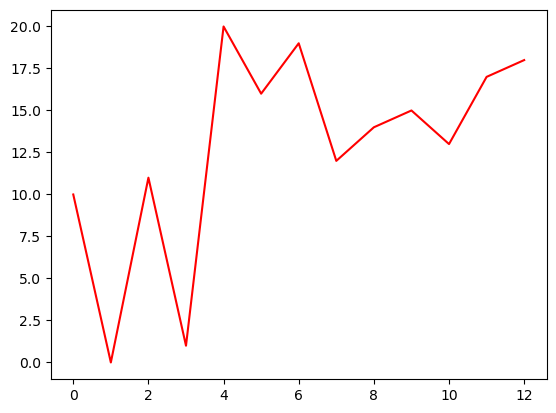

In [57]:
get_network_graph("session_length")

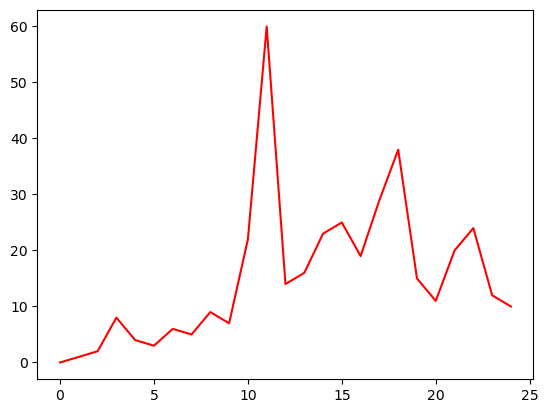

In [58]:
get_network_graph("hist_user_behavior_n_seekfwd")

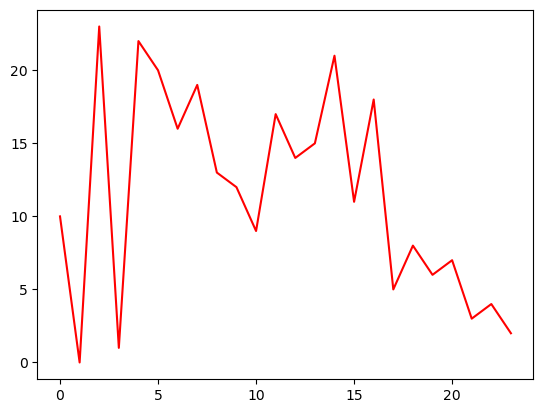

In [59]:
get_network_graph("hour_of_day")

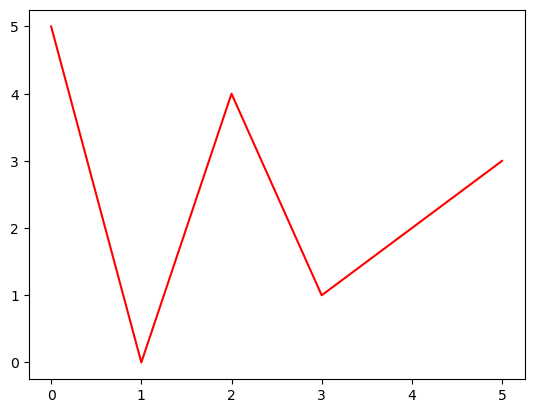

In [60]:
get_network_graph("context_type")

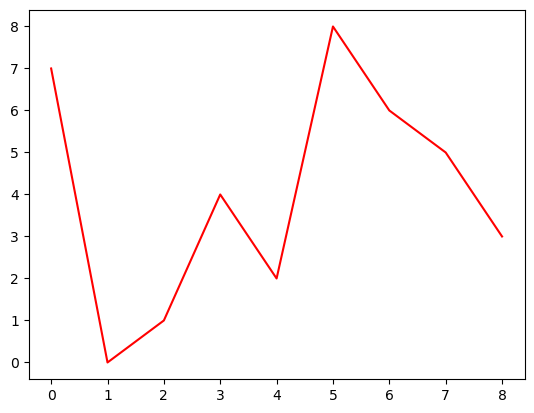

In [61]:
get_network_graph("hist_user_behavior_reason_start")

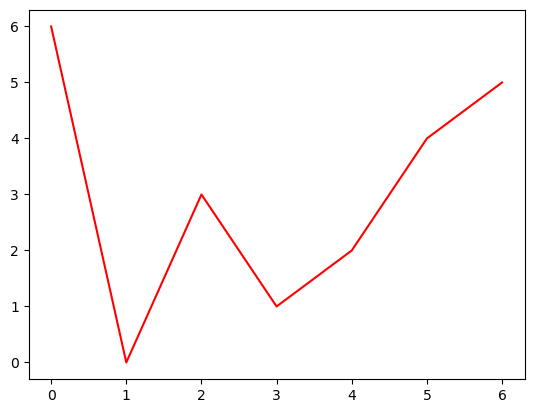

In [62]:
get_network_graph("hist_user_behavior_reason_end")

Skewness: beat_strength = -0.121
Kurtosis: beat_strength = -0.54
Mean: beat_strength = 0.55
Max: beat_strength = 0.99
Min: beat_strength = 0.0
Median: beat_strength = 0.55
Std: beat_strength = 0.16
Var: beat_strength = 0.03


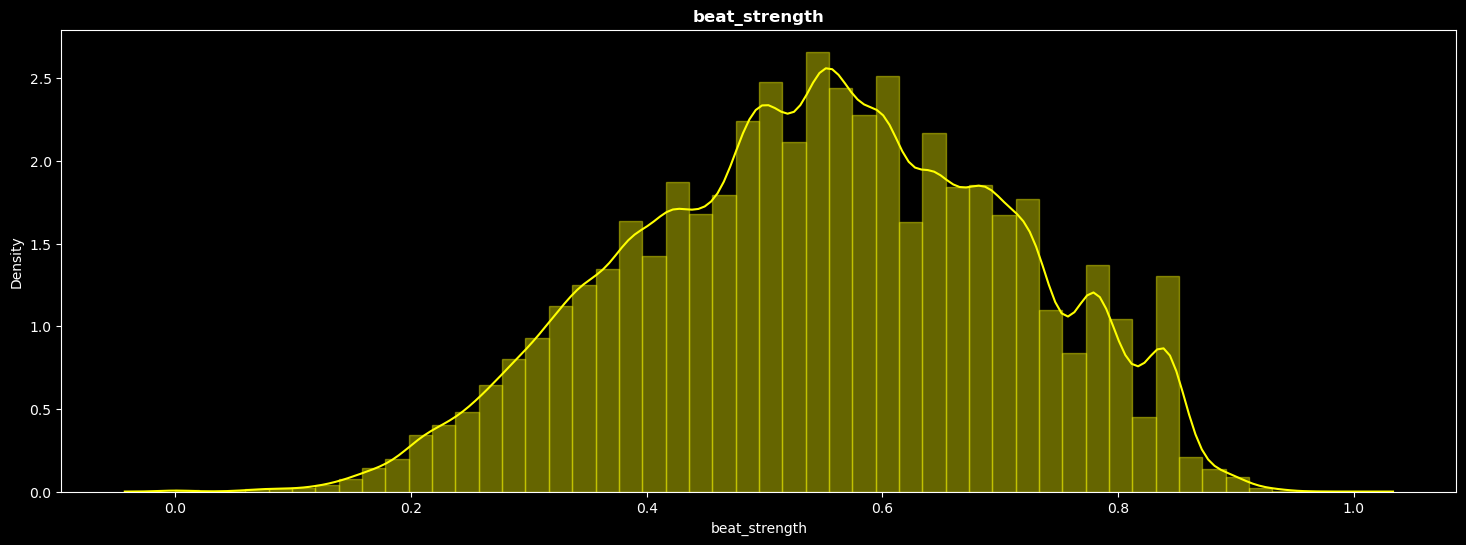

Skewness: bounciness = -0.326
Kurtosis: bounciness = -0.63
Mean: bounciness = 0.58
Max: bounciness = 0.97
Min: bounciness = 0.0
Median: bounciness = 0.59
Std: bounciness = 0.18
Var: bounciness = 0.03


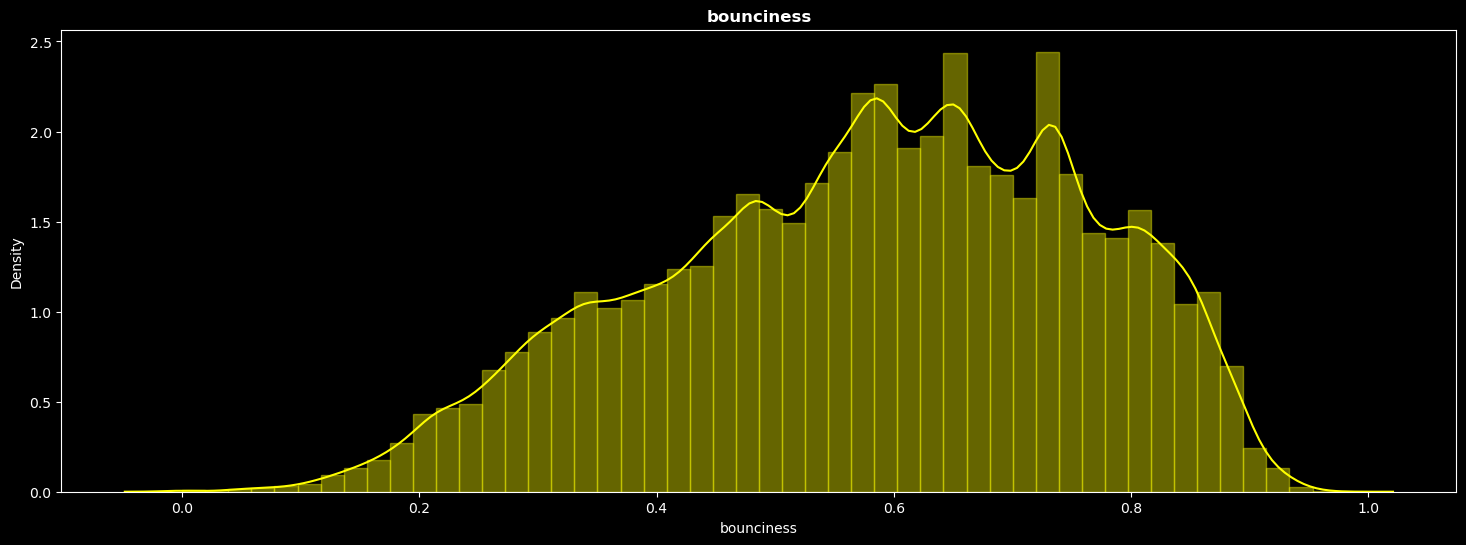

Skewness: danceability = -0.545
Kurtosis: danceability = 0.01
Mean: danceability = 0.67
Max: danceability = 0.98
Min: danceability = 0.0
Median: danceability = 0.69
Std: danceability = 0.16
Var: danceability = 0.03


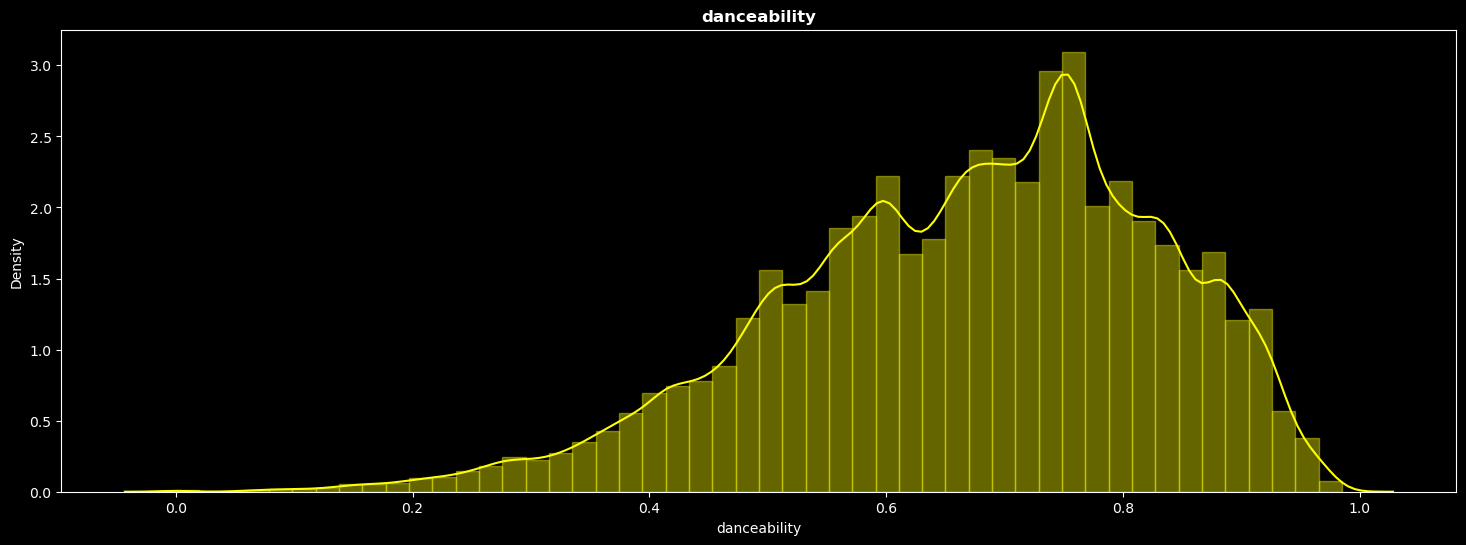

Skewness: energy = -0.378
Kurtosis: energy = -0.01
Mean: energy = 0.63
Max: energy = 1.0
Min: energy = 0.0
Median: energy = 0.63
Std: energy = 0.18
Var: energy = 0.03


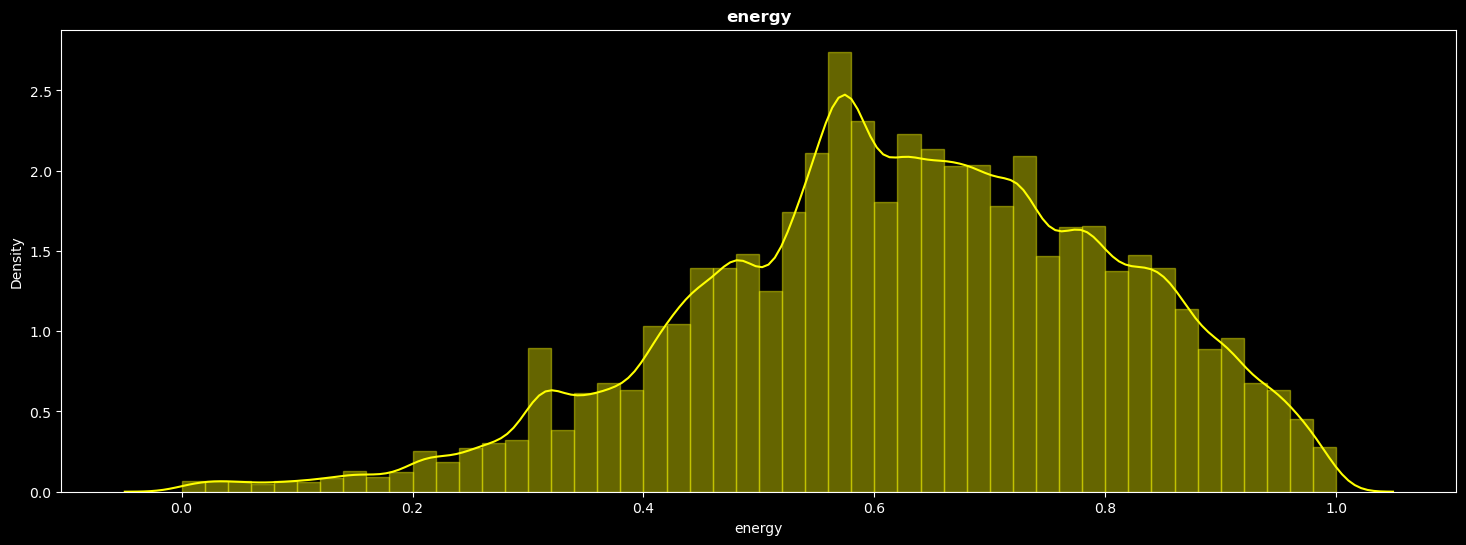

Skewness: flatness = -2.777
Kurtosis: flatness = 31.45
Mean: flatness = 1.01
Max: flatness = 1.1
Min: flatness = 0.0
Median: flatness = 1.01
Std: flatness = 0.04
Var: flatness = 0.0


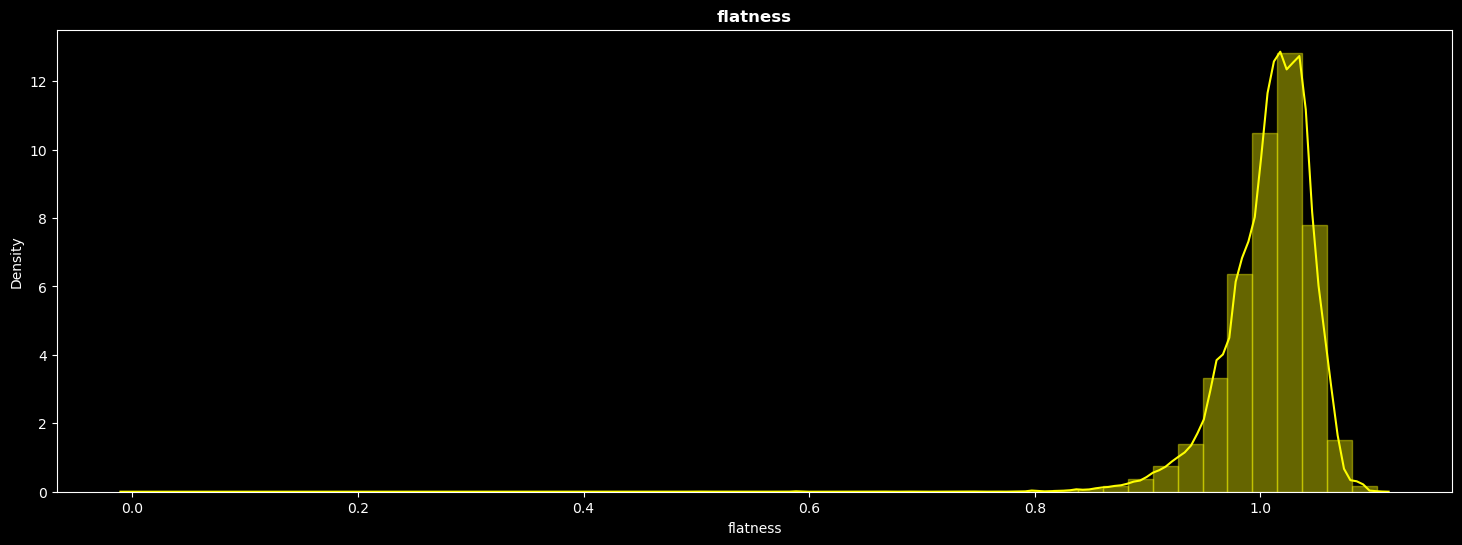

Skewness: loudness = -0.63
Kurtosis: loudness = 0.0
Mean: loudness = 0.0
Max: loudness = 2.56
Min: loudness = -2.38
Median: loudness = 0.15
Std: loudness = 1.0
Var: loudness = 1.0


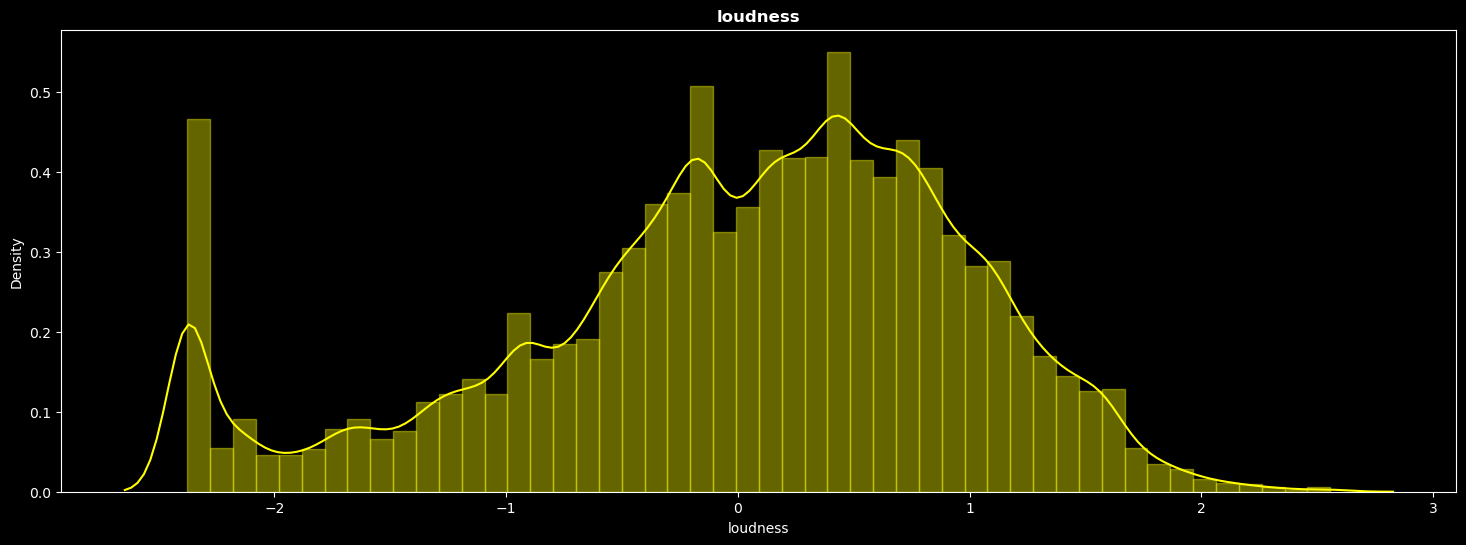

Skewness: mechanism = -0.507
Kurtosis: mechanism = -0.63
Mean: mechanism = 0.6
Max: mechanism = 1.0
Min: mechanism = 0.0
Median: mechanism = 0.64
Std: mechanism = 0.21
Var: mechanism = 0.04


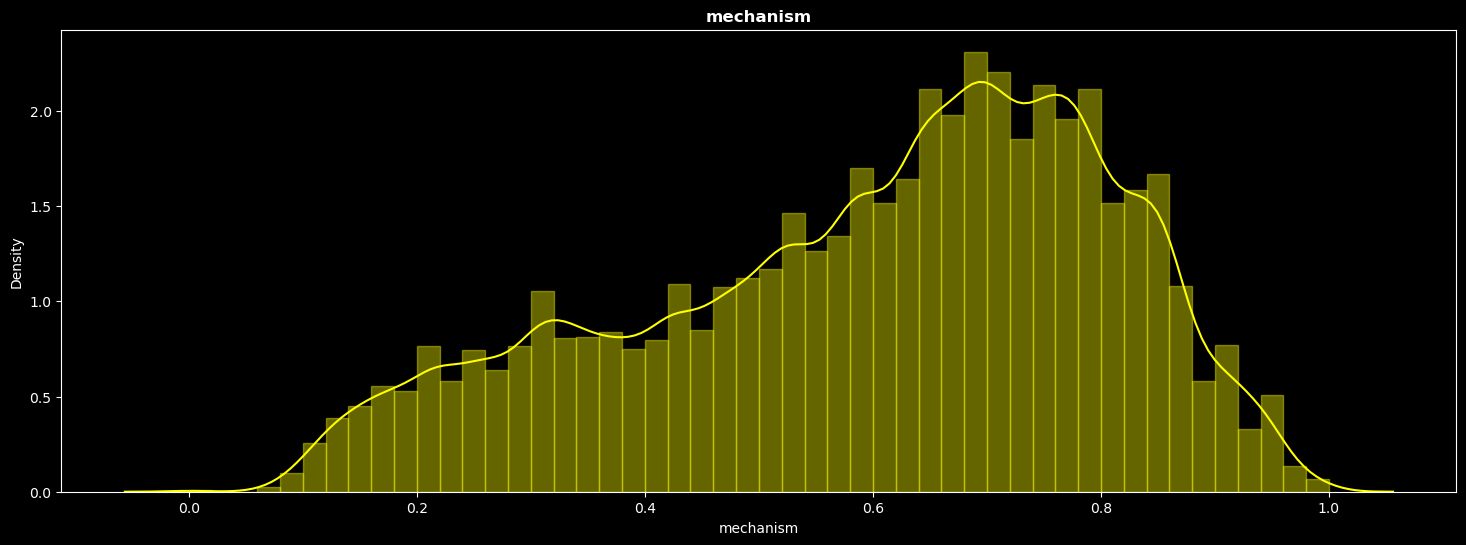

Skewness: organism = 0.736
Kurtosis: organism = -0.01
Mean: organism = 0.35
Max: organism = 0.96
Min: organism = 0.0
Median: organism = 0.31
Std: organism = 0.19
Var: organism = 0.04


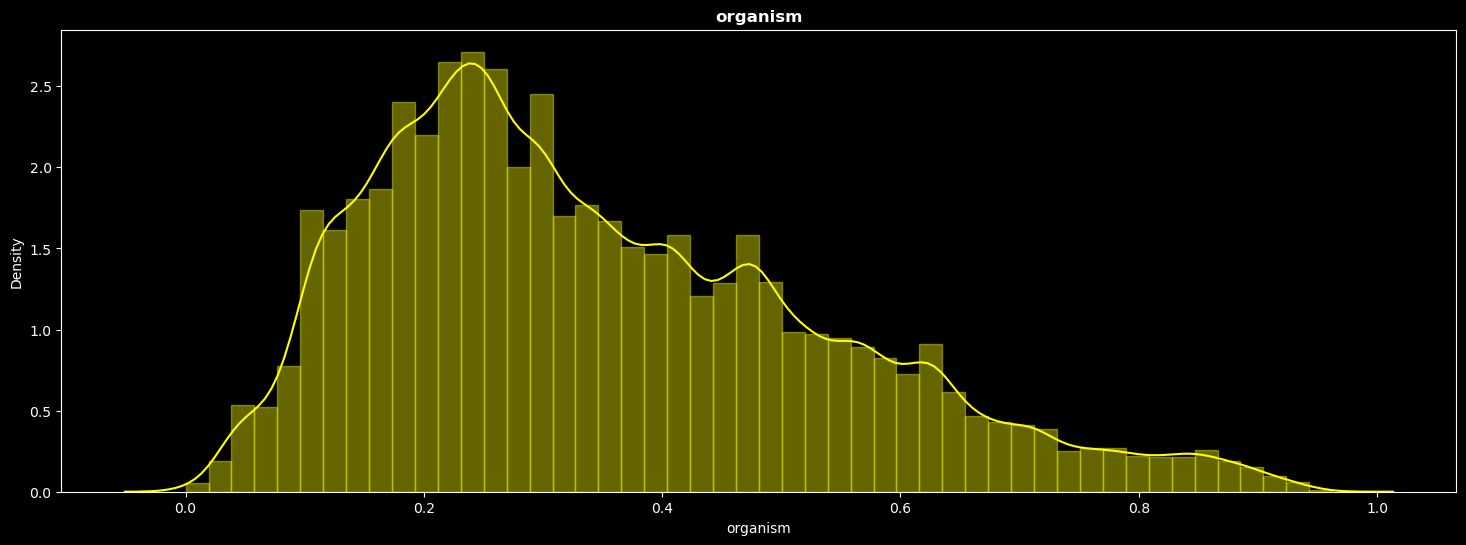

Skewness: valence = 0.256
Kurtosis: valence = -0.77
Mean: valence = 0.46
Max: valence = 1.0
Min: valence = 0.0
Median: valence = 0.44
Std: valence = 0.23
Var: valence = 0.05


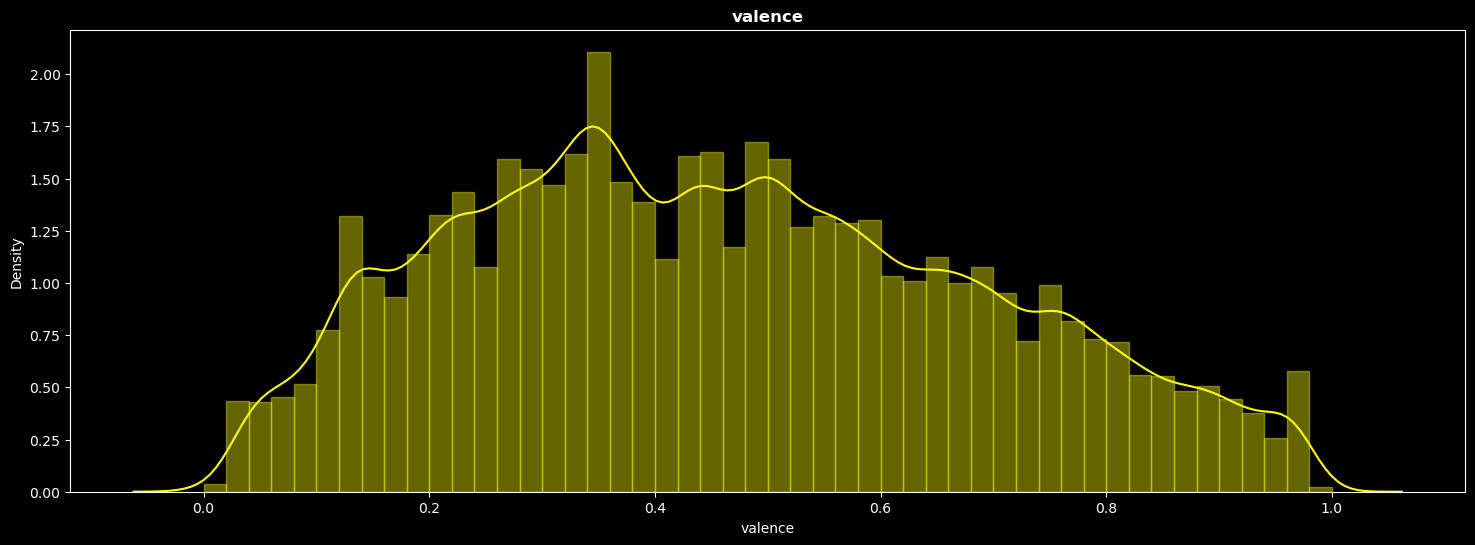

Skewness: acoustic_vector_0 = 0.723
Kurtosis: acoustic_vector_0 = -0.68
Mean: acoustic_vector_0 = -0.52
Max: acoustic_vector_0 = 0.93
Min: acoustic_vector_0 = -1.12
Median: acoustic_vector_0 = -0.66
Std: acoustic_vector_0 = 0.39
Var: acoustic_vector_0 = 0.15


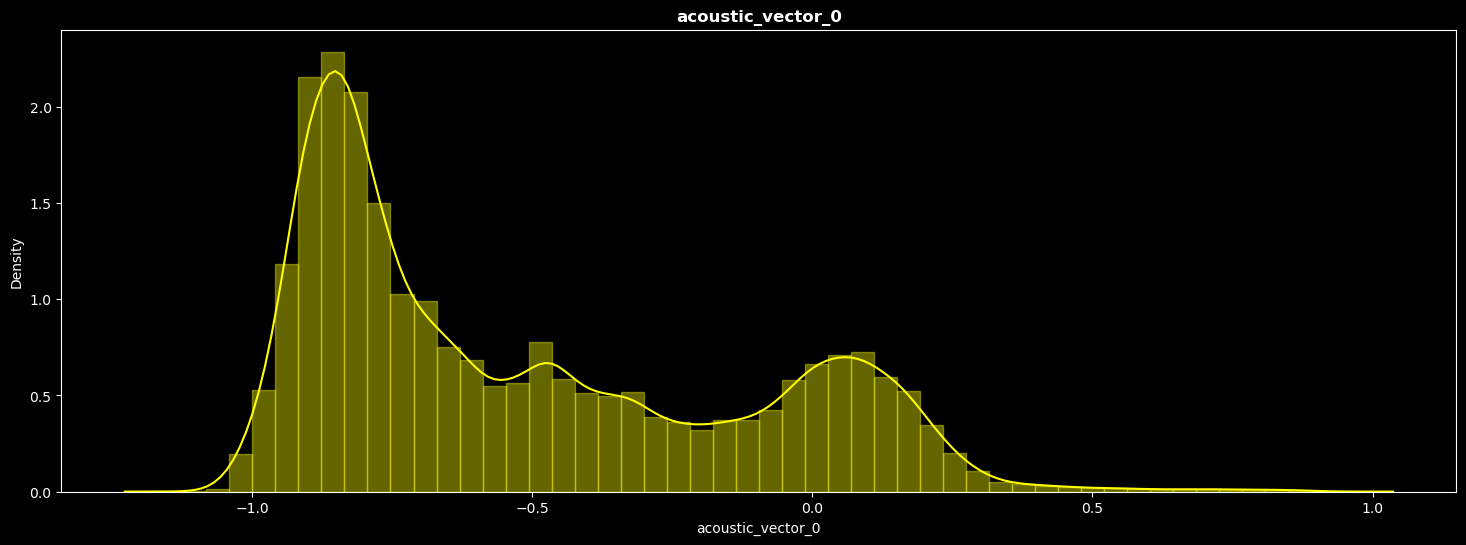

Skewness: acoustic_vector_1 = -1.903
Kurtosis: acoustic_vector_1 = 5.86
Mean: acoustic_vector_1 = 0.27
Max: acoustic_vector_1 = 0.81
Min: acoustic_vector_1 = -1.08
Median: acoustic_vector_1 = 0.31
Std: acoustic_vector_1 = 0.19
Var: acoustic_vector_1 = 0.04


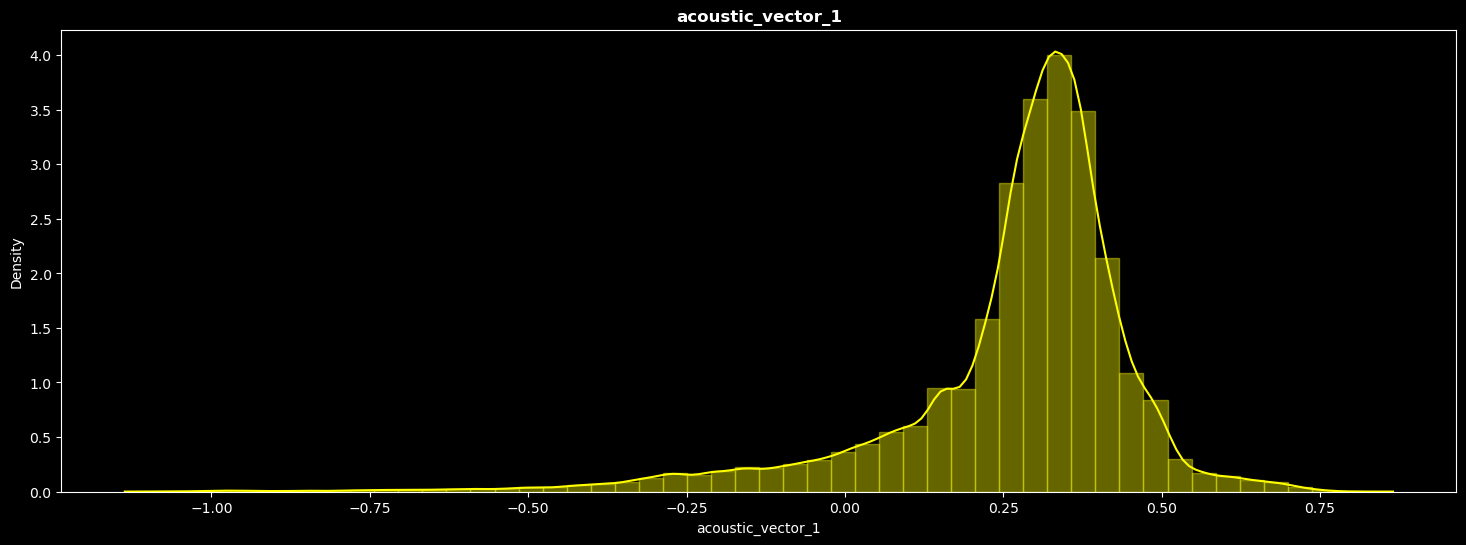

Skewness: acoustic_vector_2 = -1.567
Kurtosis: acoustic_vector_2 = 3.16
Mean: acoustic_vector_2 = 0.21
Max: acoustic_vector_2 = 0.61
Min: acoustic_vector_2 = -0.75
Median: acoustic_vector_2 = 0.24
Std: acoustic_vector_2 = 0.17
Var: acoustic_vector_2 = 0.03


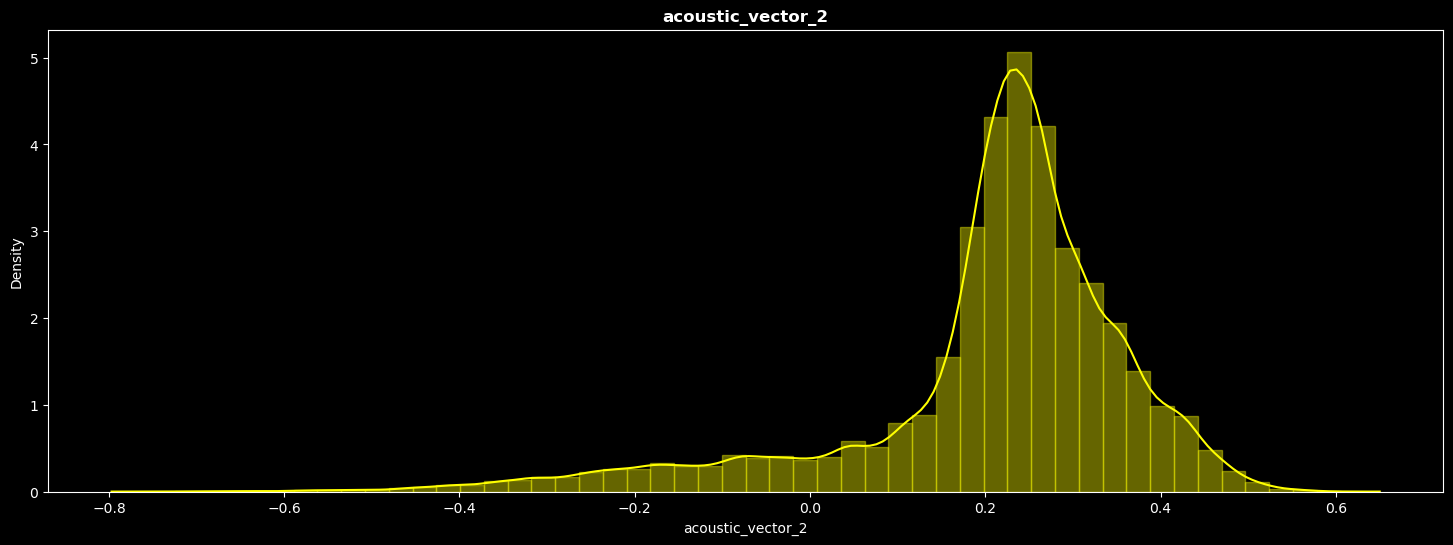

Skewness: acoustic_vector_3 = -0.137
Kurtosis: acoustic_vector_3 = 0.57
Mean: acoustic_vector_3 = -0.02
Max: acoustic_vector_3 = 1.07
Min: acoustic_vector_3 = -0.81
Median: acoustic_vector_3 = 0.04
Std: acoustic_vector_3 = 0.27
Var: acoustic_vector_3 = 0.07


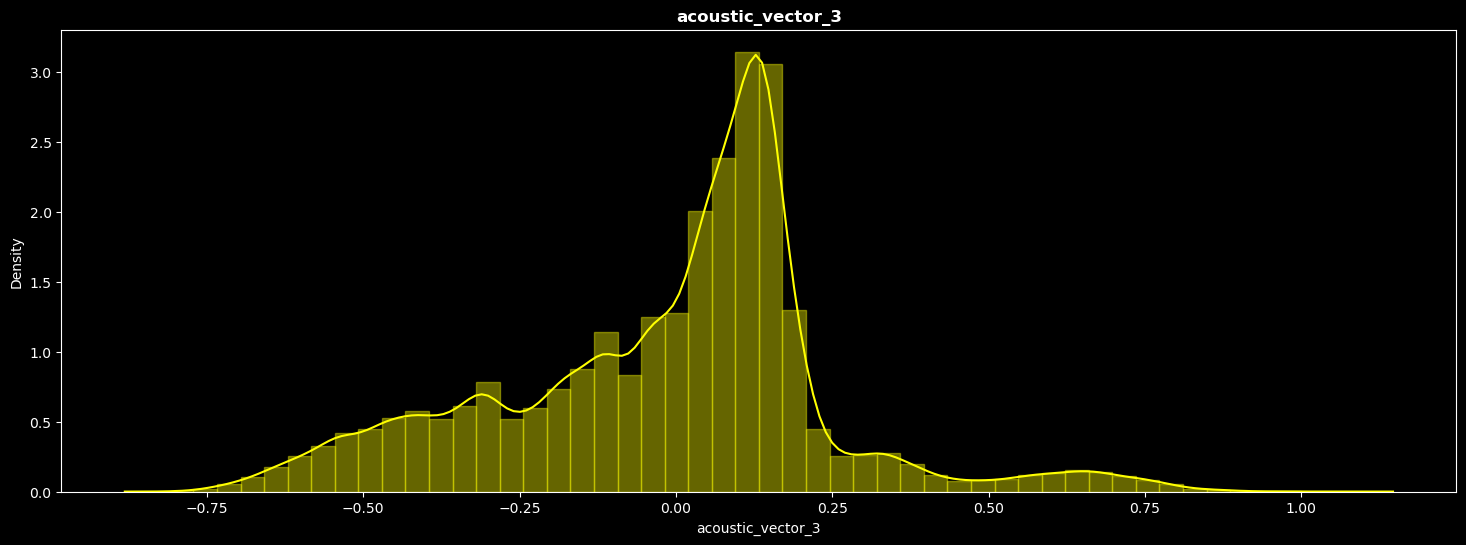

Skewness: acoustic_vector_4 = 1.284
Kurtosis: acoustic_vector_4 = 0.75
Mean: acoustic_vector_4 = -0.14
Max: acoustic_vector_4 = 0.9
Min: acoustic_vector_4 = -1.03
Median: acoustic_vector_4 = -0.27
Std: acoustic_vector_4 = 0.31
Var: acoustic_vector_4 = 0.1


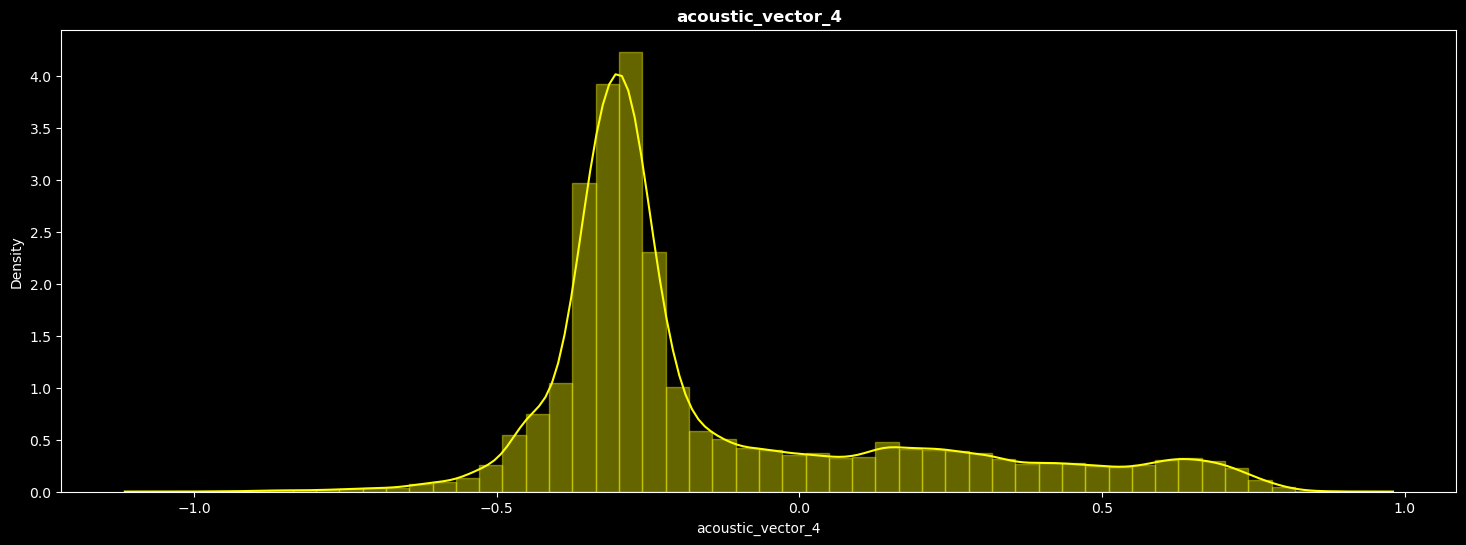

Skewness: acoustic_vector_5 = -0.777
Kurtosis: acoustic_vector_5 = 3.27
Mean: acoustic_vector_5 = 0.05
Max: acoustic_vector_5 = 0.38
Min: acoustic_vector_5 = -0.94
Median: acoustic_vector_5 = 0.04
Std: acoustic_vector_5 = 0.12
Var: acoustic_vector_5 = 0.01


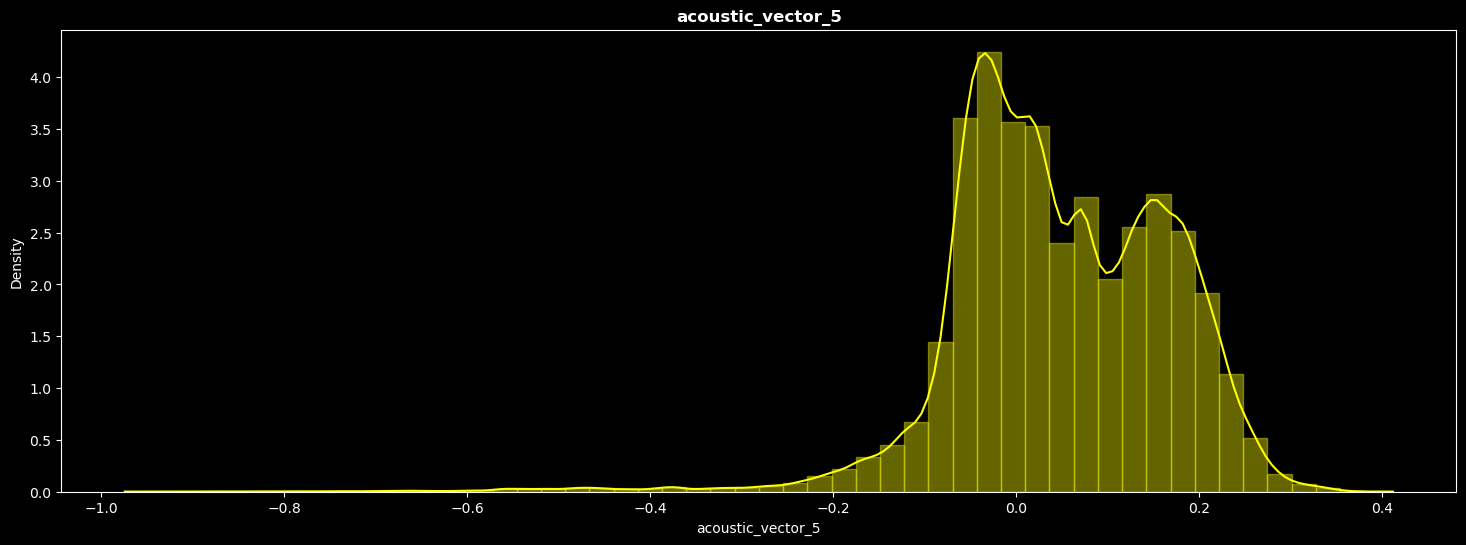

Skewness: acoustic_vector_6 = 1.707
Kurtosis: acoustic_vector_6 = 2.79
Mean: acoustic_vector_6 = -0.28
Max: acoustic_vector_6 = 0.97
Min: acoustic_vector_6 = -0.74
Median: acoustic_vector_6 = -0.38
Std: acoustic_vector_6 = 0.3
Var: acoustic_vector_6 = 0.09


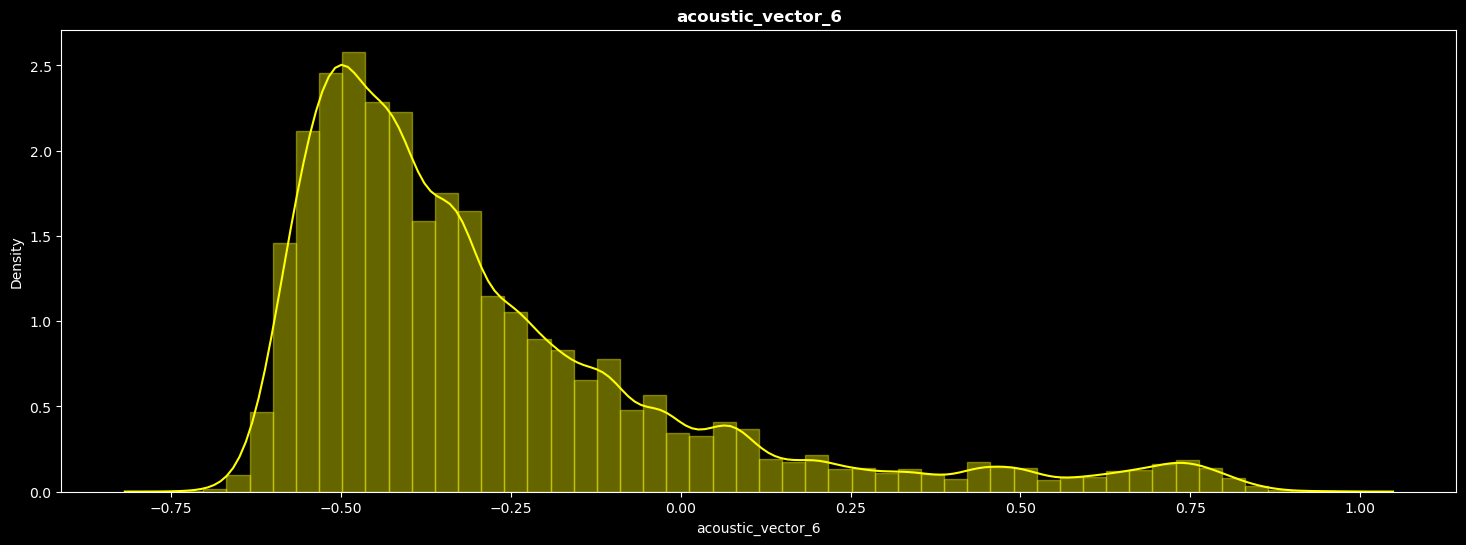

Skewness: acoustic_vector_7 = -1.107
Kurtosis: acoustic_vector_7 = 1.82
Mean: acoustic_vector_7 = 0.06
Max: acoustic_vector_7 = 1.15
Min: acoustic_vector_7 = -0.98
Median: acoustic_vector_7 = 0.14
Std: acoustic_vector_7 = 0.26
Var: acoustic_vector_7 = 0.07


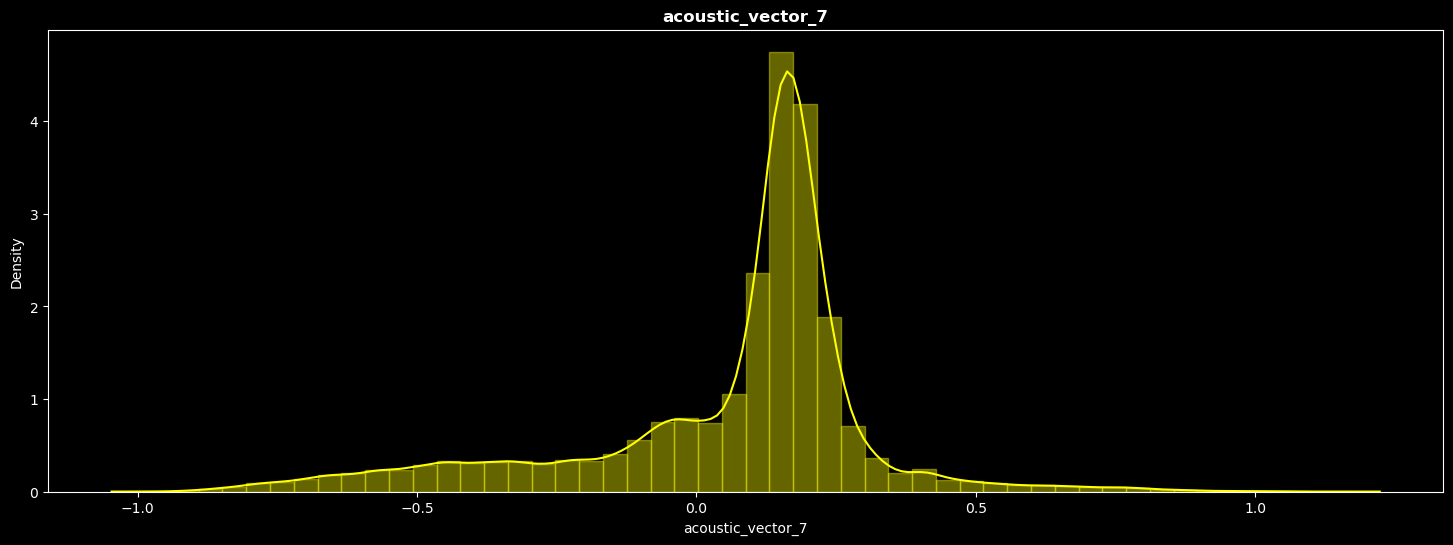

In [65]:
plt.style.use('dark_background')

var = ['beat_strength','bounciness','danceability','energy', 'flatness', 'loudness', 'mechanism', 'organism', 'valence', 'acoustic_vector_0'	,'acoustic_vector_1'	,'acoustic_vector_2'	,'acoustic_vector_3',	'acoustic_vector_4'	,'acoustic_vector_5'	,'acoustic_vector_6'	,'acoustic_vector_7']

from scipy.stats import skew

for col in df[var]:
    print("Skewness:",col,"=",round(skew(df[col]),3))
    print("Kurtosis:",col,    "=",round(df[col].kurt(),2))
    print("Mean:",col,    "=",round(df[col].mean(),2))
    print("Max:",col,     "=",round(df[col].max(),2))
    print("Min:",col,     "=",round(df[col].min(),2))
    print("Median:",col,  "=",round(df[col].median(),2))
    print("Std:",col,     "=",round(df[col].std(),2))
    print("Var:",col,     "=",round(df[col].var(),2))
    plt.figure(figsize=(18,6))
    sns.distplot(df[col],kde=True,bins=50,color="Yellow",hist_kws={"edgecolor": (1,1,0,1)})
    plt.title(col,fontweight="bold")
    plt.show()
    print("====="*25)

In [63]:
df=df.drop(['month','year','date','session_id','acoustic_vector_1','valence','time_signature','tempo','mechanism','loudness','liveness','key','flatness','energy','danceability','beat_strength','us_popularity_estimate','release_year'],axis =1 )

Feature Engingeering

Feature creation: Feature creation involves the process of generating new features from the existing set of features. It is done to provide a better representation of the data or to capture new patterns that were not present in the original data.

In [64]:
# Feature Extraction
from sklearn.decomposition import PCA

# Initialize PCA with 3 components
pca = PCA(n_components=3)

# Select columns for feature extraction
acoustic_vectors = df.loc[:, 'acoustic_vector_0':'acoustic_vector_7']

# Fit PCA to the data and transform it
acoustic_vectors_pca = pca.fit_transform(acoustic_vectors)

# Add PCA components as new features to the DataFrame
df['acoustic_vector_pca1'] = acoustic_vectors_pca[:, 0]
df['acoustic_vector_pca2'] = acoustic_vectors_pca[:, 1]
df['acoustic_vector_pca3'] = acoustic_vectors_pca[:, 2]


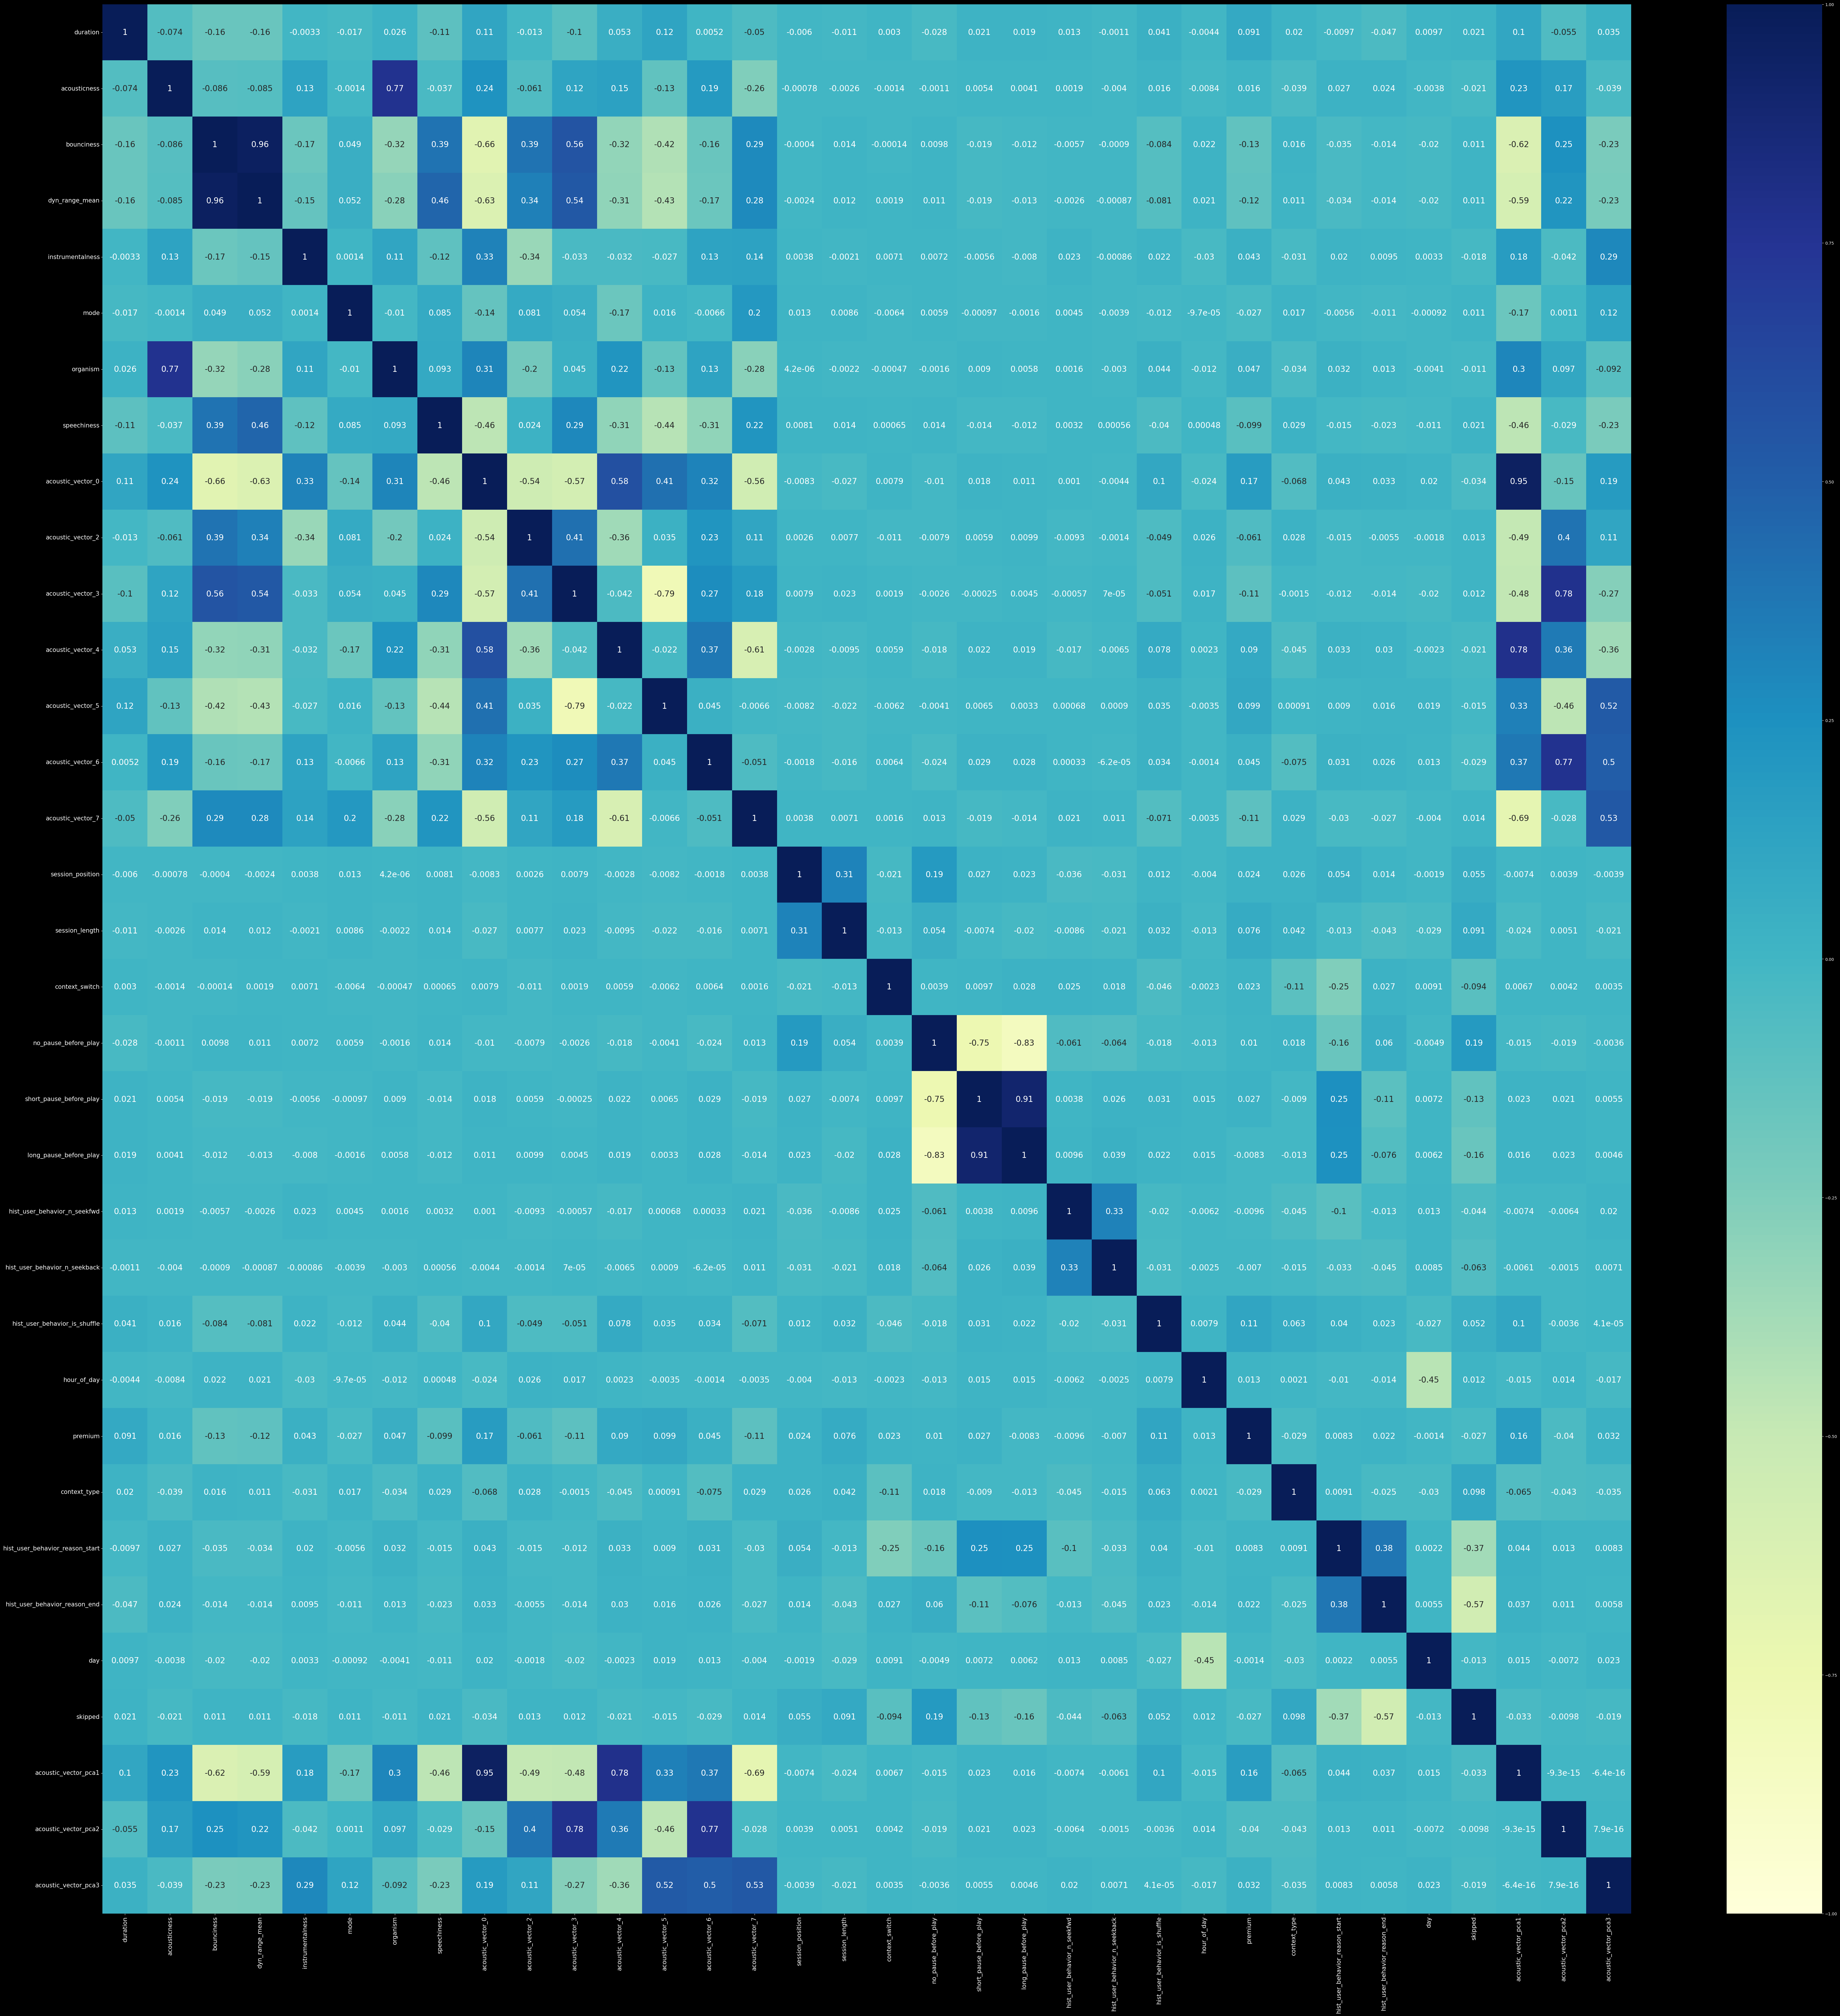

In [68]:
#Feature Selection
#Correlation using heatmap
def heat_map(df):
    plt.figure(figsize=(70, 70))
    heatmap = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu",annot_kws={"fontsize":20}, vmin=-1, vmax=1)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=15)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=15)
    plt.tight_layout()
    plt.show()

heat_map(df)

In [65]:
#Drop some Features
df = df.drop(['track_id','bounciness','dyn_range_mean','instrumentalness','mode','organism','acoustic_vector_3',
              'acoustic_vector_5','acoustic_vector_7','hour_of_day','day','acoustic_vector_pca2','hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback'], axis=1)
df.head(5).T

0          1          2          3  \
duration                         -2.101816  -0.525216  -0.525216  -1.068091   
acousticness                      0.458040   0.916272   0.916272   0.812884   
speechiness                       0.079985   0.083877   0.083877   0.038777   
acoustic_vector_0                -0.033284   0.145703   0.145703   0.021720   
acoustic_vector_2                -0.028580   0.123860   0.123860   0.333247   
acoustic_vector_4                 0.832467   0.371803   0.371803   0.411094   
acoustic_vector_6                -0.299464  -0.213120  -0.213120  -0.387599   
session_position                 10.000000   8.000000  10.000000   6.000000   
session_length                   10.000000  11.000000  11.000000  10.000000   
context_switch                    0.000000   0.000000   0.000000   0.000000   
no_pause_before_play              1.000000   1.000000   1.000000   0.000000   
short_pause_before_play           0.000000   0.000000   0.000000   1.000000   
long_pause_before_play            0.000000   0.000000   0.000000   1.000000   
hist_user_behavior_is_shuffle     1.000000   0.000000   0.000000   0.000000   
premium                           1.000000   1.000000   1.000000   1.000000   
context_type                      5.000000   4.000000   4.000000   5.000000   
hist_user_behavior_reason_start   7.000000   7.000000   1.000000   7.000000   
hist_user_behavior_reason_end     6.000000   6.000000   3.000000   6.000000   
skipped                           0.000000   0.000000   1.000000   0.000000   
acoustic_vector_pca1              0.990301   0.725870   0.725870   0.614852   
acoustic_vector_pca3             -0.862729  -0.631396  -0.631396  -0.617094   

                                         4  
duration                         -0.773742  
acousticness                      0.396854  
speechiness                       0.038337  
acoustic_vector_0                 0.039143  
acoustic_vector_2                -0.051825  
acoustic_vector_4                 0.614825  
acoustic_vector_6                -0.265953  
session_position                  2.000000  
session_length                   20.000000  
context_switch                    0.000000  
no_pause_before_play              0.000000  
short_pause_before_play           1.000000  
long_pause_before_play            1.000000  
hist_user_behavior_is_shuffle     0.000000  
premium                           1.000000  
context_type                      0.000000  
hist_user_behavior_reason_start   7.000000  
hist_user_behavior_reason_end     2.000000  
skipped                           0.000000  
acoustic_vector_pca1              0.970459  
acoustic_vector_pca3             -0.571315

In [66]:
df.shape

(167879, 21)

- Precision is the measure of correctly predicted positive instances out of all instances predicted as positive.
- Recall is the measure of correctly capturing actual positive instances.
- F1-score is the harmonic mean of precision and recall, providing a balanced metric.
- Support indicates the number of instances in each class.
- Accuracy represents the overall percentage of correctly classified instances.
- Macro Average calculates the average of precision, recall, and F1-score across all classes, giving equal weight to each class.
- Weighted Average calculates the average of precision, recall, and F1-score across all classes, weighted by the support of each class.

# Random forest 

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
model = RandomForestClassifier(n_estimators=30)

In [77]:
#Splitting data to target variable y and and input data 
X = df.drop('skipped',axis=1)
y = df['skipped']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [82]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
# Making predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
train_score = RFC.score(X_train,y_train)
test_score= RFC.score(X_test,y_test)
print("Train Score : ", train_score*100," %")
print("Test Score : ", test_score*100," %")

In [88]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 87.16642840123899%


In [92]:
RFC.score(X_train, y_train)

0.9958377698189914

In [94]:
cm2 = confusion_matrix(y_test,y_pred, labels=clf.classes_)
cm2

array([[16852,  2560],
       [ 1749, 12415]])

In [96]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [100]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=clf.classes_)

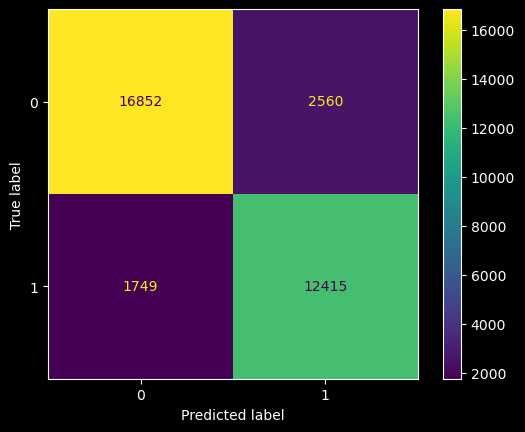

In [101]:
disp2.plot()

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     19412
           1       0.83      0.88      0.85     14164

    accuracy                           0.87     33576
   macro avg       0.87      0.87      0.87     33576
weighted avg       0.87      0.87      0.87     33576



# Support Vector Machine 

In [103]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [104]:
x = df.drop('skipped',axis=1)
y = df[['skipped']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [105]:
sv = SVC()

In [106]:
sv.fit(x_train,y_train)

SVC()

In [135]:
pred2 = sv.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [134]:
train_score = sv.score(X_train,y_train)
test_score= sv.score(X_test,y_test)
print("Train Score : ", train_score*100," %")
print("Test Score : ", test_score*100," %")

Train Score :  50.05174865788553  %
Test Score :  49.77960447939004  %


In [109]:
accuracy_score(y_test,pred2)

0.8607040743388135

In [112]:
cm2 = confusion_matrix(y_test,pred2, labels=sv.classes_)
cm2

array([[15810,  3704],
       [  973, 13089]])

In [113]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=sv.classes_)
disp1

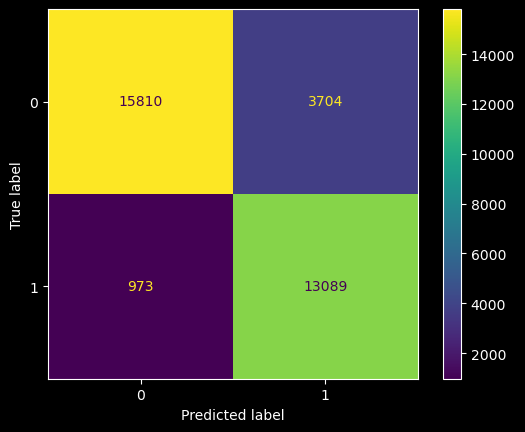

In [114]:
disp1.plot()

In [115]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87     19514
           1       0.78      0.93      0.85     14062

    accuracy                           0.86     33576
   macro avg       0.86      0.87      0.86     33576
weighted avg       0.87      0.86      0.86     33576



# KNN 

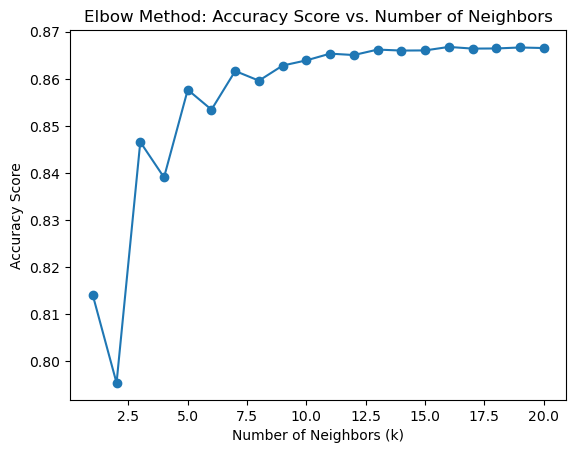

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

x= df.drop('skipped',axis=1)
y = df['skipped']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=80)

k_values = []
accuracy_scores = []

# range of k values to test
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)

    ypred = knn.predict(xtest)

    accuracy = accuracy_score(ytest, ypred)

    # Append the current value of k and accuracy
    k_values.append(k)
    accuracy_scores.append(accuracy)

# Plot the elbow curve
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('Elbow Method: Accuracy Score vs. Number of Neighbors')
plt.show()

In [68]:
best_random_state = None
best_test_score = 0

#random states to test
random_state_range = range(1, 50)

for random_state in random_state_range:
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=random_state)
    knn = KNeighborsClassifier(n_neighbors=12)
    knn.fit(xtrain, ytrain)

    test_score = knn.score(xtest, ytest)
    
    # Check if the current test score is better than the previous best test score
    if test_score > best_test_score:
        best_test_score = test_score
        best_random_state = random_state

print("Best Random State:", best_random_state)
print("Best Test Score: {:.2f}%".format(best_test_score * 100))


Best Random State: 32
Best Test Score: 86.75%


In [69]:
train_score = knn.score(xtrain,ytrain)
test_score= knn.score(xtest,ytest)
print("Train Score : ", train_score*100," %")
print("Test Score : ", test_score*100," %")

Train Score :  87.566174992368  %
Test Score :  86.28782463664523  %


In [70]:
ypred = knn.predict(xtest)

# Evaluate the model's performance on the test set
acc = accuracy_score(ytest, ypred)
report = classification_report(ytest, ypred)
cm = confusion_matrix(ytest, ypred)

# Print the evaluation metrics
print("Accuracy:", acc*100)
print("--"*30)
print("Classification report:\n", report)
print("--"*30)
print("Confusion matrix:\n", cm)

NameError: name 'classification_report' is not defined

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred3 = lr.predict(x_test)

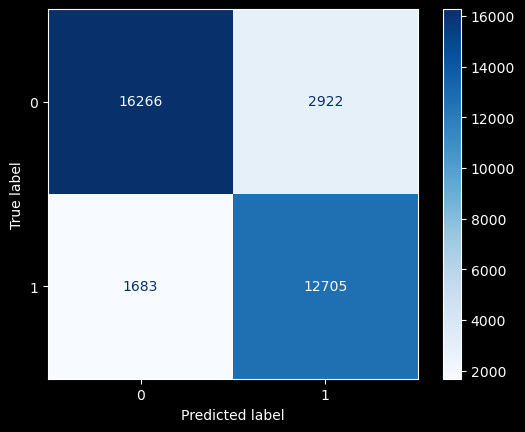

In [126]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp1.plot(cmap=plt.cm.Blues)

# Regularised Logistic Regression 

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

best_random_state = None
best_test_score = 0

# random states to test
random_state_range = range(1, 101)

for random_state in random_state_range:
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=random_state)

    # Set penalty='l2' for L2 regularization
    
    lr = LogisticRegression(penalty='l2')
    lr.fit(xtrain, ytrain)

    test_score = lr.score(xtest, ytest)
    
    # Check if the current test score is better than the previous best test score
    if test_score > best_test_score:
        best_test_score = test_score
        best_random_state = random_state


print("Best Random State:", best_random_state)
print("Best Test Score: {:.2f}%".format(best_test_score * 100))

Best Random State: 53
Best Test Score: 83.02%


In [128]:
train_score = lr.score(xtrain,ytrain)
test_score= lr.score(xtest,ytest)
print("Train Score : ", train_score*100," %")
print("Test Score : ", test_score*100," %")

Train Score :  82.68988779103967  %
Test Score :  82.27007386228257  %


In [131]:
ypred = lr.predict(xtest)
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Evaluate the model's performance on the test set
acc = accuracy_score(ytest, ypred)
report = classification_report(ytest, ypred)
cm = confusion_matrix(ytest, ypred)

# Print the evaluation metrics
print("Accuracy:", acc*100)
print("--"*30)
print("Classification report:\n", report)
print("--"*30)
print("Confusion matrix:\n", cm)

Accuracy: 82.27007386228257
------------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84     19405
           1       0.75      0.86      0.80     14171

    accuracy                           0.82     33576
   macro avg       0.82      0.83      0.82     33576
weighted avg       0.83      0.82      0.82     33576

------------------------------------------------------------
Confusion matrix:
 [[15442  3963]
 [ 1990 12181]]


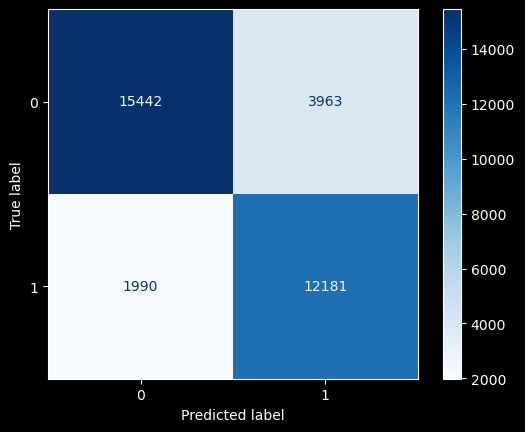

In [132]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp1.plot(cmap=plt.cm.Blues)

In [69]:
import pickle

In [70]:
pickle.dump(knn,open('model.pkl','wb'))

In [1]:
from flask import Flask,render_template,request
import pickle
import numpy as np

model = pickle.load(open('model.pkl','rb'))
app = Flask(__name__)

@app.route('/')
def html():
    return render_template('new.html')

@app.route('/predict',methods=['POST'])
def predict_skipped():
    duration = float(request.form.get('duration'))
    acousticness = float(request.form.get('acousticness'))
    speechiness = float(request.form.get('speechiness'))
    acoustic_vector_0 = float(request.form.get('acoustic_vector_0'))
    acoustic_vector_2 = float(request.form.get('acoustic_vector_2'))
    acoustic_vector_4 = float(request.form.get('acoustic_vector_4'))
    acoustic_vector_6 = float(request.form.get('acoustic_vector_6'))
    session_position = float(request.form.get('session_position'))
    session_length = float(request.form.get('session_length'))
    context_switch = float(request.form.get('context_switch'))
    no_pause_before_play = float(request.form.get('no_pause_before_play'))
    short_pause_before_play = float(request.form.get('short_pause_before_play'))
    long_pause_before_play = float(request.form.get('long_pause_before_play'))
    context_type = float(request.form.get('context_type'))
    premium = float(request.form.get('premium'))
    hist_user_behavior_is_shuffle = float(request.form.get('hist_user_behavior_is_shuffle'))
    hist_user_behavior_reason_start = float(request.form.get('hist_user_behavior_reason_start'))
    hist_user_behavior_reason_end = float(request.form.get('hist_user_behavior_reason_end'))
    acoustic_vector_pca1 = float(request.form.get('acoustic_vector_pca1'))
    acoustic_vector_pca3 = float(request.form.get('acoustic_vector_pca3'))
    
    result = model.predict(np.array([duration,acousticness,speechiness,acoustic_vector_0,acoustic_vector_2,acoustic_vector_4,acoustic_vector_6,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,context_type,premium,hist_user_behavior_is_shuffle,hist_user_behavior_reason_start,hist_user_behavior_reason_end,acoustic_vector_pca1,acoustic_vector_pca3]).reshape(1,20))
    return str(result)

if __name__=='__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [30/May/2023 20:56:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/May/2023 20:56:21] "GET /favicon.ico HTTP/1.1" 404 -
C:\Users\Nikhil\anaconda3\Kumesh\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [30/May/2023 20:57:38] "POST /predict HTTP/1.1" 200 -


In [1]:
from flask import Flask,render_template,request
import pickle
import numpy as np

model = pickle.load(open('model.pkl','rb'))
app = Flask(__name__)

@app.route('/')
def html():
    return render_template('new.html')

@app.route('/predict',methods=['POST'])
def predict_skipped():
    duration = float(request.form.get('duration'))
    acousticness = float(request.form.get('acousticness'))
    speechiness = float(request.form.get('speechiness'))
    acoustic_vector_0 = float(request.form.get('acoustic_vector_0'))
    acoustic_vector_2 = float(request.form.get('acoustic_vector_2'))
    acoustic_vector_4 = float(request.form.get('acoustic_vector_4'))
    acoustic_vector_6 = float(request.form.get('acoustic_vector_6'))
    session_position = float(request.form.get('session_position'))
    session_length = float(request.form.get('session_length'))
    context_switch = float(request.form.get('context_switch'))
    no_pause_before_play = float(request.form.get('no_pause_before_play'))
    short_pause_before_play = float(request.form.get('short_pause_before_play'))
    long_pause_before_play = float(request.form.get('long_pause_before_play'))
    context_type = float(request.form.get('context_type'))
    premium = float(request.form.get('premium'))
    hist_user_behavior_is_shuffle = float(request.form.get('hist_user_behavior_is_shuffle'))
    hist_user_behavior_reason_start = float(request.form.get('hist_user_behavior_reason_start'))
    hist_user_behavior_reason_end = float(request.form.get('hist_user_behavior_reason_end'))
    acoustic_vector_pca1 = float(request.form.get('acoustic_vector_pca1'))
    acoustic_vector_pca3 = float(request.form.get('acoustic_vector_pca3'))
    
    result = model.predict(np.array([duration,acousticness,speechiness,acoustic_vector_0,acoustic_vector_2,acoustic_vector_4,acoustic_vector_6,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,context_type,premium,hist_user_behavior_is_shuffle,hist_user_behavior_reason_start,hist_user_behavior_reason_end,acoustic_vector_pca1,acoustic_vector_pca3]).reshape(1,20))
    
    if result[0] == 1:
        result = 'skipped track'
    else:
        result = 'not skipped'
    return result

if __name__=='__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [05/Jun/2023 15:58:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2023 15:58:21] "GET /favicon.ico HTTP/1.1" 404 -
C:\Users\Nikhil\anaconda3\Kumesh\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [05/Jun/2023 16:01:53] "POST /predict HTTP/1.1" 200 -


In [1]:
from flask import Flask, render_template, request
import pickle

import numpy as np

lModel = pickle.load(open('model.pkl', 'rb'))
app = Flask(__name__)


@app.route('/')
def form():
    return render_template('index.html')


@app.route('/submit', methods=["POST"])
def submit():
    duration = float(request.form("duration"))
    acousticness = float(request.form("acousticness"))
    speechiness = float(request.form("speechiness"))
    acoustic_vector_0 = float(request.form("acoustic_vector_0"))
    acoustic_vector_2 = float(request.form("acoustic_vector_2"))
    acoustic_vector_4 = float(request.form("acoustic_vector_4"))
    acoustic_vector_6 = float(request.form("acoustic_vector_6"))
    session_position = float(request.form("session_position"))
    session_length = float(request.form("session_length"))
    context_switch = float(request.form("context_switch"))
    no_pause_before_play = float(request.form("no_pause_before_play"))
    short_pause_before_play = float(request.form("short_pause_before_play"))
    long_pause_before_play = float(request.form("long_pause_before_play"))
    hist_user_behavior_is_shuffle = float(
        request.form("hist_user_behavior_is_shuffle"))
    premium = float(request.form("premium"))
    context_type = float(request.form("context_type"))
    hist_user_behavior_reason_start = float(
        request.form("hist_user_behavior_reason_start"))
    hist_user_behavior_reason_end = float(
        request.form("hist_user_behavior_reason_end"))
    acoustic_vector_pca1 = float(request.form("acoustic_vector_pca1"))
    acoustic_vector_pca3 = float(request.form("acoustic_vector_pca3"))

    predictedVal = model.predict(np.array([duration, acousticness, speechiness, acoustic_vector_0, acoustic_vector_2, acoustic_vector_4, acoustic_vector_6, session_position, session_length, context_switch, no_pause_before_play,
                                  short_pause_before_play, long_pause_before_play, context_type, premium, hist_user_behavior_is_shuffle, hist_user_behavior_reason_start, hist_user_behavior_reason_end, acoustic_vector_pca1, acoustic_vector_pca3]).reshape(1, 20))
    
    if predictedVal[0] == 1:
        predictedVal = 'skipped track'
    else:
        predictedVal = 'Track Not Skipped'

    return render_template("index.html", prediction=predictedVal)

if __name__=='__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [06/Jun/2023 14:26:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2023 14:26:18] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Jun/2023 14:34:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2023 14:34:40] "GET / HTTP/1.1" 200 -
